<h1> Utility Functions

In [1]:
def plotCorr(df):
    """Derives & plots correlation between supplied series"""
    try:
        oCorr = df.corr()
        fig, ax = plt.subplots(figsize=(size, size))
        ax.matshow(oCorr)
        plt.yticks(range(len(oCorr.columns)), oCorr.columns);
        plt.xticks(range(len(oCorr.columns)), oCorr.columns);
        #sns.heatmap(oCorr, xticklabels=oCorr.columns.values, yticklabels=oCorr.columns.values)
        #oCorr.style.background_gradient(cmap='coolwarm').set_precision(2)
    except:
        pass

#######################################

def plotCorrSNSreg(df):
    """Derives & fit a reg along with distribution between supplied series"""
    try:
        x = sns.pairplot(df.dropna(), diag_kind="kde", kind="reg")
        #x.map_lower(corrfunc)
        plt.show()
    except:
        pass
    
#######################################
    
def plotCorrSNSvalue(df, x):
    """Derives & plots correlation between supplied series"""
    try:
        plt.figure(figsize=(15,15))
        sns.heatmap(df.dropna().corr(), annot=x)
        plt.show()
    except:
        pass

#######################################   
    
def nullPer(df):
    """Quantifies missing values"""
    try:        
        return(df.isnull().mean()*100)
    except:
        pass

#######################################

def uniVar(x):
    """Computes univariate matrics"""
    try: 
        print(x.describe())
        print("Skewness: %f" % x.skew())
        print("Kurtosis: %f" % x.kurt())
    except:
        pass
    
#######################################

def edaScatter(x):
    """Renders Scatter plot (Multivariate)"""
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    try:    
        for i in range(1, len(yDF.columns)):
            fig.add_subplot(5, 5, i)
            plt.scatter(x=xDF[x], y=yDF.iloc[:, i], alpha=0.5)
            plt.title(yDF.columns[i])
    except:
        pass

#######################################
    
def edaCat(x):
    """Renders Scatter plot (Multivariate - categorical)"""
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    try:      
        for i in range(1, len(yDF.columns)):
            fig.add_subplot(5, 5, i)
            plt.scatter(x=xDF[x].astype("category"), y=yDF.iloc[:, i], alpha=0.5)
            plt.title(yDF.columns[i])
    except:
        pass

#######################################

def imputeMedian(df, x):
    """Imputes median - treatement for missing values in Pandas series"""
    try:
        df[x].fillna(df[x].median(), inplace = True)
    except:
        pass
    
#######################################  
#0.5 is too punishing for the sample size so I've reduced alpha to make more features qualify.

def regLasso(x, y, alphas=[.0001, .01, .1, 1, 10]):
    """Iterates lasso regularization over various levels of alpha, any value closer to zero is linear reg,
    values farther are more regularized"""
    df = pd.DataFrame()
    df['FeatureSpace'] = xDF.columns
    #try:
    for a in alphas:
        lasso = Lasso(alpha = a)
        lasso.fit(x, y)
        col_name = 'alpha = %f' % a
        df[col_name] = lasso.coef_
        #df.iloc[:,2] = df.iloc[:,2].abs()
    return df
#     except:
#         pass
    
#######################################  
    
def elasticNet(x, y):
    """This fucntion Instantiates the ElasticNet model, grrid search the hyper parameters
    & compares the metrics with baseline model"""
    try:
        elastic = ElasticNet (normalize = True)
        gridSearch = GridSearchCV(estimator = elastic, param_grid={'alpha': np.logspace(-5,2,8), 
                                               'l1_ratio':[.2,.4,.6,.8]}, scoring = 'neg_mean_squared_error', 
                                                n_jobs=1, refit = True, cv=10)
        gridSearch.fit(x, y)
        elastic = ElasticNet(normalize = True, alpha = gridSearch.best_params_['alpha'], 
                     l1_ratio = gridSearch.best_params_['l1_ratio'])
        elastic.fit(x, y)
        elasticMetric = mean_squared_error(y, elastic.predict(x))
        elasticRMSE = np.sqrt(elasticMetric)
        elasticR2 = r2_score(y, elastic.predict(x))

        # comparing the metrics with baseline model
        baseRegression = LinearRegression(normalize = True)
        baseRegression.fit(x, y)
        baseMetric = mean_squared_error(y, baseRegression.predict(x))
        baseRMSE = np.sqrt(baseMetric)
        baseR2 = r2_score(y, baseRegression.predict(x))
        #return("ElasticNet MSE:" + str(elasticMetric) +' '+"Baseline MSE:" + str(baseMetric))
        return([str(elasticMetric),str(baseMetric), str(elasticRMSE), str(baseRMSE), str(elasticR2), str(baseR2)])
    except:
        pass
    
#######################################  
    
def responseVarAnalysis(x, y):
    """wrapper around the above function (ElasticNet) to spit out metrics in a tabular format"""
    df = pd.DataFrame()
    df['responseVar'] = y.columns
    try: 
        for a in range(0, len(y.columns)):
            df.loc[a,'elasticMSE'] = elasticNet(x, y.iloc[:,a])[0]
            df.loc[a,'baseMSE'] = elasticNet(x, y.iloc[:,a])[1]
            df.loc[a, 'elasticRMSE'] = elasticNet(x, y.iloc[:,a])[2]
            df.loc[a, 'baseRMSE'] = elasticNet(x, y.iloc[:,a])[3]
            df.loc[a, 'elasticR2'] = elasticNet(x, y.iloc[:,a])[4]
            df.loc[a, 'baseR2'] = elasticNet(x, y.iloc[:,a])[5]
        return df
    except:
        pass
    
####################################### 

def regPLS(x, y):
    """Returns mse computed based on array of n_component (40) w.r.t., PLS Regression"""
    mse = []
    component = np.arange(1, 40)
    df = pd.DataFrame()
    #df['component'] = component
    try:     
        for i in component:
            pls = PLSRegression(n_components = i)
            pls.fit(x, y)
            df.loc[i,'mse']= mean_squared_error(y, pls.predict(x))
        return df
    except:
        pass

<h1> Loading the Data
 <h5> The aggregated data which is created by converting the frame level data to video level is loaded here.

In [2]:
import pandas as pd

inp_df = pd.read_excel("./MSFT_Data_Problem_Description_V2.xlsx", sheet_name="Data")

We have 67 videos and 225 aggregated features

In [3]:
inp_df.shape

(67, 225)

<h1> Exploratory Data Analysis

Converting the multiple brand variables into related brand variable and unrelated brand variable

In [4]:
#col_list = inp_df.loc[:,"Microsoft_first_ocr":"Latino_total_duration"].columns
inp_df['Unrelated_dur'] = inp_df[inp_df.loc[:,["Intel_dur","Apple_dur","Asus_dur","Hp_dur","Dell_dur"]].columns].sum(axis=1)
inp_df['Unrelated_first_ocr'] = inp_df[inp_df.loc[:,["Intel_first_ocr","Apple_first_ocr","Asus_first_ocr","Hp_first_ocr","Dell_first_ocr"]].columns].sum(axis=1)
inp_df['Unrelated_last_ocr'] = inp_df[inp_df.loc[:,["Intel_last_ocr","Apple_last_ocr","Asus_last_ocr","Hp_last_ocr","Dell_last_ocr"]].columns].sum(axis=1)
inp_df['Unrelated_total_ocr'] = inp_df[inp_df.loc[:,["Intel_total_ocr","Apple_total_ocr","Asus_total_ocr","Hp_total_ocr","Dell_total_ocr"]].columns].sum(axis=1)

In [5]:
inp_df = inp_df.drop(['Intel_dur',
       'Intel_first_ocr', 'Intel_last_ocr', 'Intel_total_ocr', 'Apple_dur',
       'Apple_first_ocr', 'Apple_last_ocr', 'Apple_total_ocr', 'Asus_dur',
       'Asus_first_ocr', 'Asus_last_ocr', 'Asus_total_ocr', 'Hp_dur',
       'Hp_first_ocr', 'Hp_last_ocr', 'Hp_total_ocr', 'Dell_dur',
       'Dell_first_ocr', 'Dell_last_ocr', 'Dell_total_ocr'], axis=1)

In [6]:
inp_df.rename(columns=dict(zip(inp_df.columns[5:8], ['Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)

In [65]:
inp_df.columns[5:8]

Index(['Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr'],
      dtype='object')

In [7]:
inp_df.columns.values

array(['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Microsoft_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Microsoft_total_ocr', 'Female_frame_count', 'Male_frame_count',
       'Female_total_duration', 'Male_total_duration',
       'Age_0_15_frame_count', 'Age_0_5_frame_count',
       'Age_15_24_frame_count', 'Age_25_34_frame_count', 'Age_35_44',
       'Age_45_60_frame_count', 'Age_0_15_total_duration',
       'Age_0_5_total_duration', 'Age_15_24_total_duration',
       'Age_25_34_total_duration', 'Age_35_44_total_duration',
       'Age_45_60_total_duration', 'Angry_frame_count',
       'Disgust_frame_count', 'Fear_frame_count', 'Happiness_frame_count',
       'Neutral_frame_count', 'Sadness_frame_count',
       'Surprise_frame_count', 'Angry_total_duration',
       'Disgust_total_duration', 'Fear_total_duration',
       'Happiness_total_duration', 'Neutral_total_duration',
       'Sadness_total_duration'

In [17]:
xDF = inp_df.loc[:,['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Microsoft_frame_count', 'Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr', 'Microsoft_total_ocr', 'Female_frame_count',
       'Male_frame_count', 'Female_total_duration', 'Male_total_duration',
       'Age_0_15_frame_count', 'Age_0_5_frame_count', 'Age_15_24_frame_count',
       'Age_25_34_frame_count', 'Age_35_44', 'Age_45_60_frame_count',
       'Age_0_15_total_duration', 'Age_0_5_total_duration',
       'Age_15_24_total_duration', 'Age_25_34_total_duration',
       'Age_35_44_total_duration', 'Age_45_60_total_duration',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count', 'Sadness_frame_count',
       'Surprise_frame_count', 'Angry_total_duration',
       'Disgust_total_duration', 'Fear_total_duration',
       'Happiness_total_duration', 'Neutral_total_duration',
       'Sadness_total_duration', 'Surprise_total_duration',
       'African_frame_count', 'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_total_duration',
       'Caucasian_total_duration', 'Eastasian_total_duration',
       'Latino_total_duration',
       'Unrelated_dur', 'Unrelated_first_ocr', 'Unrelated_last_ocr',
       'Unrelated_total_ocr','ASUS T102_frame_count', 'Dell XPS 13_frame_count',
       'HP Spectre x360_frame_count',
       'HP Spectre x360, Windows_frame_count',
       'Lenovo Yoga 910_frame_count', 'MacBook Air_frame_count',
       'MacBook Pro_frame_count', 'Macbook Air_frame_count',
       'Microsoft Surface_frame_count', 'Surface Book_frame_count',
       'Surface Pen_frame_count', 'Surface Pro 4_frame_count',
       'Surface Pro 4, Apple_MacBookAir13_frame_count',
       'Surface Pro 4, HP Spectre x360_frame_count',
       'Surface Pro 4, MacBook Air_frame_count',
       'Surface Pro 4, MacBook Air13, MacBook Air_frame_count',
       'Surface Pro 4, Surface Book_frame_count',
       'Surface Pro 4, Windows 10_frame_count',
       'Surface pro 4_frame_count', 'Windows_frame_count',
       'Windows 10_frame_count', 'Windows 10 PC_frame_count',
       'Windows 10 PCs', 'Windows 10, HP_Spectre_frame_count',
       'Windows 10, Windows_frame_count', 'Yoga_frame_count',
       'ASUS T102_dur', 'Dell XPS 13_dur', 'HP Spectre x360_dur',
       'HP Spectre x360, Windows_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Surface Book_dur', 'Surface Pen_dur',
       'Surface Pro 4_dur', 'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface pro 4_dur', 'Windows_dur', 'Windows 10_dur',
       'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Asus_frame_count', 'Dell_frame_count', 'Hp_frame_count',
       'Lenovo_frame_count', 'Asus_dur.1', 'Dell_dur.1', 'Hp_dur.1',
       'Lenovo_dur', 'Lenovo_first_ocr', 'Lenovo_last_ocr',
       'Lenovo_total_ocr', 'Asus_first_ocr.1', 'Asus_last_ocr.1',
       'Asus_total_ocr.1', 'Hp_first_ocr.1', 'Hp_last_ocr.1',
       'Hp_total_ocr.1', 'Dell_first_ocr.1', 'Dell_last_ocr.1',
       'Dell_total_ocr.1']]
# yDF = inp_df.loc[:,['Interest_trace', 'Enjoyment_-_mean',
#        'Persuasion_score', 'Brand_appeal', 'Relevance_of_information','New_information', 'Credibility_of_information', 'Understanding']]
yDF = target_data = pd.read_excel("Updated_targets_220519.xlsx")
yDF = yDF.drop(['Video_Name'],1)

<h2> Checking for null values in input

In [18]:
print(nullPer(xDF).sort_values(ascending=False).head(10))
xDF = xDF.loc[:, nullPer(xDF)< 70]

MacBook Pro_total_ocr                    98.507463
Windows 10 PC_total_ocr                  98.507463
Surface pro 4_first_ocr                  98.507463
Surface Pro 4, MacBook Air_total_ocr     98.507463
Surface Pro 4, MacBook Air_last_ocr      98.507463
Surface Pro 4, MacBook Air_first_ocr     98.507463
Surface Pro 4, Surface Book_first_ocr    98.507463
Surface Pro 4, Surface Book_last_ocr     98.507463
Surface Pro 4, Surface Book_total_ocr    98.507463
Windows 10 PC_last_ocr                   98.507463
dtype: float64


<h1> Analyzing targets variables
<h5> No significant number of outliers. So not removing any outliers

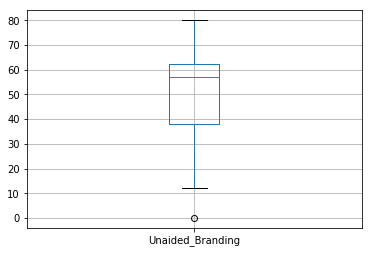

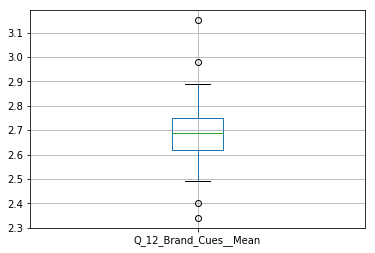

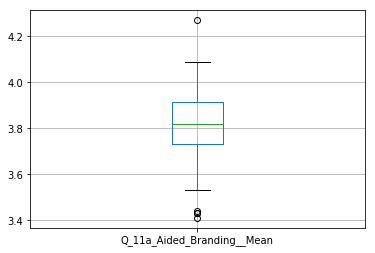

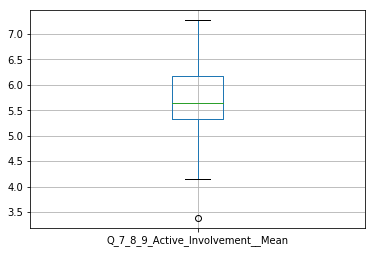

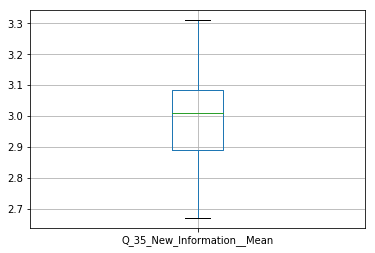

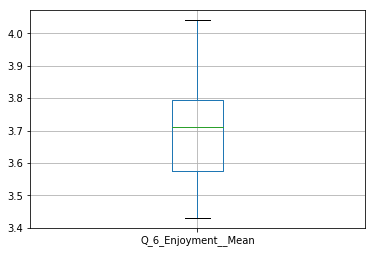

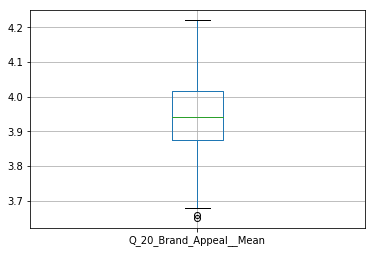

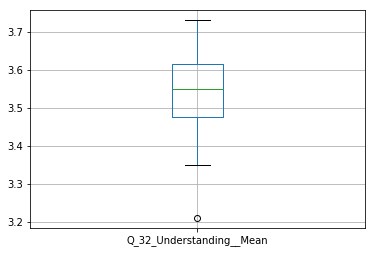

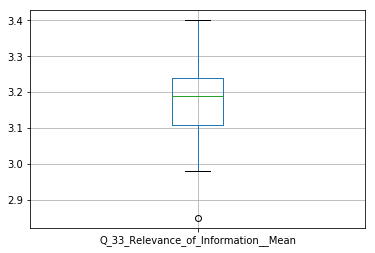

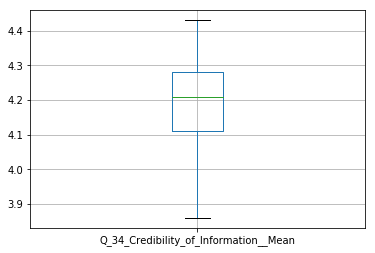

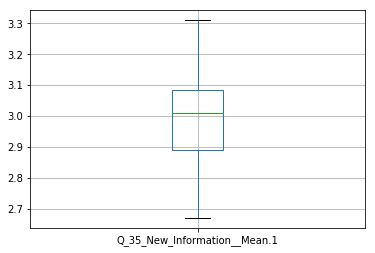

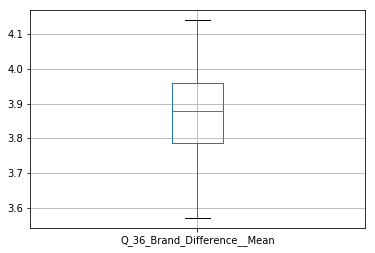

In [19]:
import matplotlib.pyplot as plt

for column in yDF:
    plt.figure()
    yDF.boxplot([column])

<h1> Correlation
<h5> Correlation as high as 0.81 can be seen with few input variables

In [20]:
inp_df.corr(method='pearson')

,Software,Length_of_ad_15,Ad_type_tv,Microsoft_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Microsoft_total_ocr,Female_frame_count,Male_frame_count,...,Hp_first_ocr.1,Hp_last_ocr.1,Hp_total_ocr.1,Dell_first_ocr.1,Dell_last_ocr.1,Dell_total_ocr.1,Unrelated_dur,Unrelated_first_ocr,Unrelated_last_ocr,Unrelated_total_ocr
Software,1.000000,0.139898,-0.078591,-0.101806,-0.101806,0.408311,-0.109137,-0.038351,0.132375,-0.140802,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388448,0.233252,0.337652,0.406179
Length_of_ad_15,0.139898,1.000000,-0.255766,-0.304917,-0.304917,-0.486260,-0.995758,-0.359322,-0.135431,-0.372875,...,-0.907876,-0.991942,0.356753,NaN,NaN,NaN,-0.137032,-0.270893,-0.351648,-0.253237
Ad_type_tv,-0.078591,-0.255766,1.000000,0.158500,0.158500,0.097794,0.216571,0.031986,-0.019276,0.168527,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000767,0.033810,0.069996,0.026924
Microsoft_frame_count,-0.101806,-0.304917,0.158500,1.000000,1.000000,-0.199708,0.303810,0.635179,0.283178,0.194110,...,0.351926,0.391816,-0.230873,NaN,NaN,NaN,0.203425,0.277140,0.315115,0.251309
Related_Brand_dur,-0.101806,-0.304917,0.158500,1.000000,1.000000,-0.199708,0.303810,0.635179,0.283178,0.194110,...,0.351926,0.391816,-0.230873,NaN,NaN,NaN,0.203425,0.277140,0.315115,0.251309
Related_Brand_first_ocr,0.408311,-0.486260,0.097794,-0.199708,-0.199708,1.000000,0.496448,-0.239499,0.015726,0.051277,...,0.871926,0.944847,-0.251734,NaN,NaN,NaN,0.231078,0.230909,0.322453,0.298431
Related_Brand_last_ocr,-0.109137,-0.995758,0.216571,0.303810,0.303810,0.496448,1.000000,0.354149,0.149664,0.349553,...,0.916610,0.995403,-0.350846,NaN,NaN,NaN,0.127440,0.280375,0.355399,0.254835
Microsoft_total_ocr,-0.038351,-0.359322,0.031986,0.635179,0.635179,-0.239499,0.354149,1.000000,0.055417,0.179875,...,0.469272,0.540925,-0.289775,NaN,NaN,NaN,0.051851,0.009777,0.040054,0.089614
Female_frame_count,0.132375,-0.135431,-0.019276,0.283178,0.283178,0.015726,0.149664,0.055417,1.000000,-0.362349,...,0.029346,0.030815,0.042220,NaN,NaN,NaN,0.113337,0.112574,0.116299,0.001595
Male_frame_count,-0.140802,-0.372875,0.168527,0.194110,0.194110,0.051277,0.349553,0.179875,-0.362349,1.000000,...,0.693044,0.708911,-0.381314,NaN,NaN,NaN,0.016166,0.233853,0.191323,0.130332


<h1> Imputation of Missing values
<h5> Imputing with median values

In [21]:
nullPer(xDF)[nullPer(xDF) != 0].index.values

array(['Microsoft_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Microsoft_total_ocr', 'Windows 10_first_ocr',
       'Windows 10_last_ocr', 'Windows 10_total_ocr', 'Asus_frame_count',
       'Dell_frame_count', 'Hp_frame_count', 'Lenovo_frame_count',
       'Asus_dur.1', 'Dell_dur.1', 'Hp_dur.1', 'Lenovo_dur'], dtype=object)

In [22]:
#nullPer(xDF)
imputeMedian(xDF, 'Microsoft_frame_count')
imputeMedian(xDF, 'Related_Brand_dur')
imputeMedian(xDF, 'Related_Brand_first_ocr')
imputeMedian(xDF, 'Related_Brand_last_ocr')
imputeMedian(xDF, 'Microsoft_total_ocr')

imputeMedian(yDF, 'Persuasion_score')

#xDF[x].fillna(xDF[x].median(), inplace = True)
                           
# Asus_frame_count                                 
# Dell_frame_count                                 
# Hp_frame_count                                   
# Lenovo_frame_count  

# Windows 10_first_ocr                             
# Windows 10_last_ocr                              
# Windows 10_total_ocr  

# Asus_dur.1                                       
# Dell_dur.1                                       
# Hp_dur.1                                         
# Lenovo_dur
#assert xDF.isnull().sum().sum() == 0, "Check for missing values in feature space"

In [23]:
xDF.isnull().sum().sort_values

<bound method Series.sort_values of Video_name                                        0
Software                                          0
Length_of_ad_15                                   0
Ad_type_tv                                        0
Microsoft_frame_count                             0
Related_Brand_dur                                 0
Related_Brand_first_ocr                           0
Related_Brand_last_ocr                            0
Microsoft_total_ocr                               0
Female_frame_count                                0
Male_frame_count                                  0
Female_total_duration                             0
Male_total_duration                               0
Age_0_15_frame_count                              0
Age_0_5_frame_count                               0
Age_15_24_frame_count                             0
Age_25_34_frame_count                             0
Age_35_44                                         0
Age_45_60_frame_count       

In [24]:
xDF = xDF.fillna(0)

In [25]:
yDF.isnull().sum()

Unaided_Branding                         0
Q_12_Brand_Cues__Mean                    0
Q_11a_Aided_Branding__Mean               0
Q_7_8_9_Active_Involvement__Mean         0
Q_35_New_Information__Mean               0
Q_6_Enjoyment__Mean                      0
Q_20_Brand_Appeal__Mean                  0
Q_32_Understanding__Mean                 0
Q_33_Relevance_of_Information__Mean      0
Q_34_Credibility_of_Information__Mean    0
Q_35_New_Information__Mean.1             0
Q_36_Brand_Difference__Mean              0
dtype: int64

<h1> Oversampling
<h5> Increasing the sample by creating synthetic samples using SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = {0:200,1:200})

In [27]:
temp_inp_df = pd.concat([xDF,yDF],1).drop(['Video_name','Length_of_ad_15'],1)

In [28]:
X_res, y_res = sm.fit_resample(temp_inp_df,inp_df.Length_of_ad_15)

/home/internbmilap562/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (200) in class 0 will be larger than the number of samples in the majority class (class #0 -> 34)
  n_samples_majority))
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (200) in class 1 will be larger than the number of samples in the majority class (class #0 -> 34)
  n_samples_majority))


In [29]:
resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
resamp_target_df = pd.DataFrame(y_res,columns=['Length_of_ad_15'])
resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
resamp_data_df['Video_name'] = inp_df['Video_name']
resamp_inputs_df = resamp_data_df[xDF.columns]
resamp_target_df = resamp_data_df[yDF.columns]
resamp_data_df

,Software,Ad_type_tv,Microsoft_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Microsoft_total_ocr,Female_frame_count,Male_frame_count,Female_total_duration,...,Q_35_New_Information__Mean,Q_6_Enjoyment__Mean,Q_20_Brand_Appeal__Mean,Q_32_Understanding__Mean,Q_33_Relevance_of_Information__Mean,Q_34_Credibility_of_Information__Mean,Q_35_New_Information__Mean.1,Q_36_Brand_Difference__Mean,Length_of_ad_15,Video_name
0,1.000000,1.000000,10.000000,5.000000,23.500000,29.500000,2.000000,9.000000,0.000000,4.500000,...,3.100000,3.830000,4.010000,3.610000,3.240000,4.360000,3.100000,4.090000,0,Angela - SW Win 10 30 TV US
1,1.000000,1.000000,8.000000,4.000000,11.000000,16.000000,2.000000,4.000000,0.000000,2.000000,...,2.970000,3.890000,4.040000,3.530000,3.200000,4.360000,2.970000,4.060000,1,Angela Inking - SW Win 10 15 TV US
2,1.000000,1.000000,8.000000,4.000000,11.000000,16.000000,2.000000,3.000000,0.000000,1.500000,...,3.050000,3.850000,3.900000,3.520000,3.360000,4.350000,3.050000,3.960000,1,Angela Versatility - SW Win 10 15 TV US
3,0.000000,1.000000,7.000000,3.500000,1.000000,29.500000,3.000000,10.000000,0.000000,5.000000,...,3.110000,3.710000,4.050000,3.430000,3.270000,4.280000,3.110000,4.080000,0,Ariela - Surface SP4 30 TV US
4,1.000000,1.000000,4.000000,2.000000,26.500000,30.000000,2.000000,0.000000,20.000000,0.000000,...,2.950000,3.590000,4.020000,3.510000,3.130000,4.200000,2.950000,3.890000,0,Beowulf - SW Win 10 30 TV US
5,1.000000,1.000000,9.000000,4.500000,11.000000,16.500000,2.000000,0.000000,6.000000,0.000000,...,2.870000,3.520000,3.880000,3.580000,3.000000,4.160000,2.870000,3.750000,1,Beowulf Pen - SW Win 10 15 TV US
6,1.000000,1.000000,9.000000,4.500000,11.000000,16.500000,2.000000,0.000000,4.000000,0.000000,...,2.960000,3.720000,3.940000,3.640000,3.270000,4.270000,2.960000,3.910000,1,Beowulf Versatility - SW Win 10 15 TV US
7,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,12.000000,0.000000,...,3.010000,3.750000,4.050000,3.530000,3.210000,4.230000,3.010000,3.790000,0,Best Buy No VO - SW HP 30 TV US
8,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,10.000000,0.000000,...,2.940000,3.790000,3.920000,3.580000,3.210000,4.260000,2.940000,3.840000,0,Best Buy No VO - SW HP Computers 30 TV US
9,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,12.000000,0.000000,...,3.010000,3.890000,4.070000,3.650000,3.400000,4.390000,3.010000,4.000000,0,Best Buy No VO - SW Win 10 30 TV US


<h1> XGBoost model

In [30]:
#####
parameters_tree={"colsample_bytree":[0.2,0.4,0.6,0.8,1],"max_depth":[2,3,4,5,6,8,12,13,14,15],"min_samples_leaf":[2,3,4,5,6],"n_estimators":[100,150,200,300,400,500,1000]}
parameters_learning = {"learning_rate":[0.001,0.01,0.1],"alpha":[1,10,100,1000]}
param_estimators ={"n_estimators":[1000,2000,4000,6000,8000,10000,20000]}

In [38]:
#### RMSE was decreasing with increaasing n_estimators
Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 13, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 13, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Active_Involvement__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Enjoyment__Mean_params= {'colsample_bytree': 0.4, 'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.001}
Brand_Appeal__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.1}
Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Relevance_of_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Credibility_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}

In [39]:
training_params=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

Unaided_Branding
R2_SCORE: 0.987051
R2_SCORE: 0.951924


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


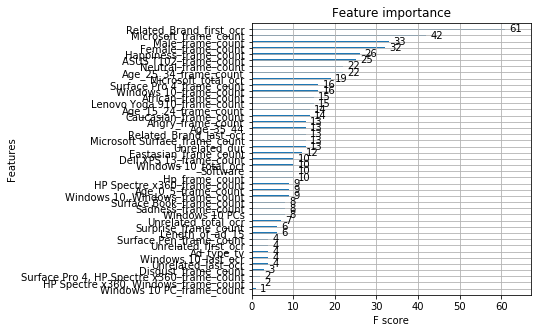

Q_12_Brand_Cues__Mean
R2_SCORE: 0.963322
R2_SCORE: 0.842861


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


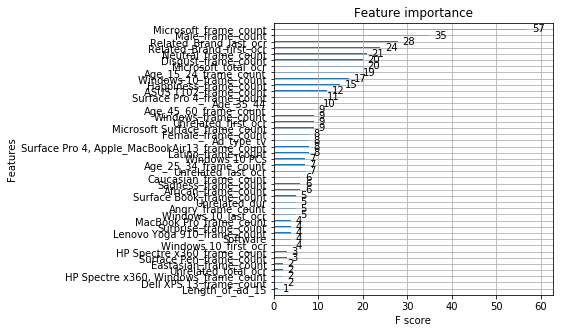

Q_11a_Aided_Branding__Mean
R2_SCORE: 0.963080
R2_SCORE: 0.890903


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


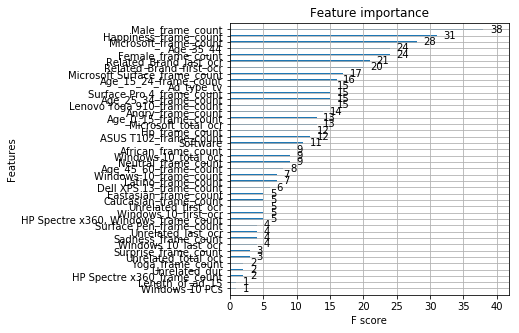

Q_7_8_9_Active_Involvement__Mean
R2_SCORE: 0.986103
R2_SCORE: 0.938152


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


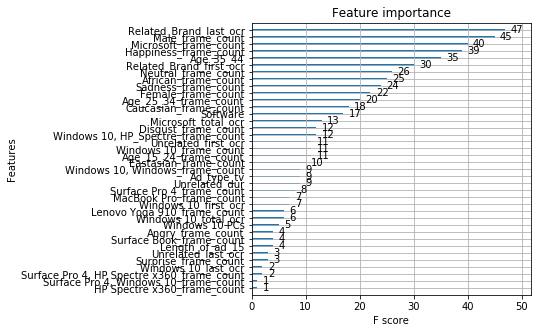

Q_35_New_Information__Mean
R2_SCORE: 0.974122
R2_SCORE: 0.904064


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


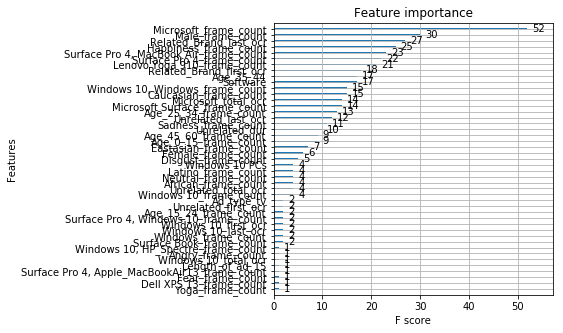

Q_6_Enjoyment__Mean
R2_SCORE: 0.964055
R2_SCORE: 0.848512


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


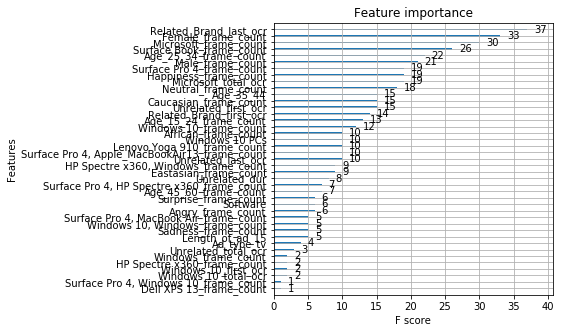

Q_20_Brand_Appeal__Mean
R2_SCORE: 0.972942
R2_SCORE: 0.881042


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


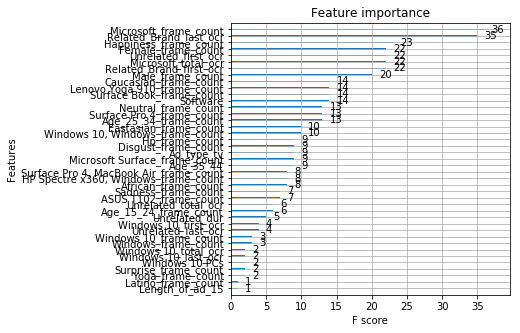

Q_32_Understanding__Mean
R2_SCORE: 0.957461
R2_SCORE: 0.860666


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


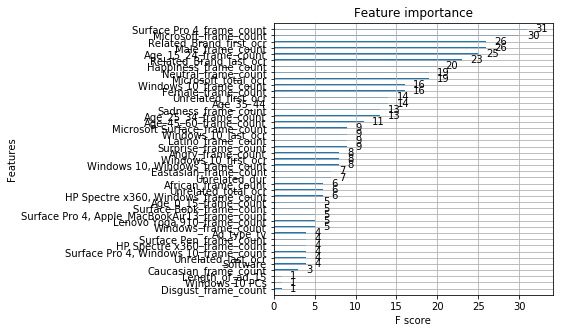

Q_33_Relevance_of_Information__Mean
R2_SCORE: 0.948178
R2_SCORE: 0.801585


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


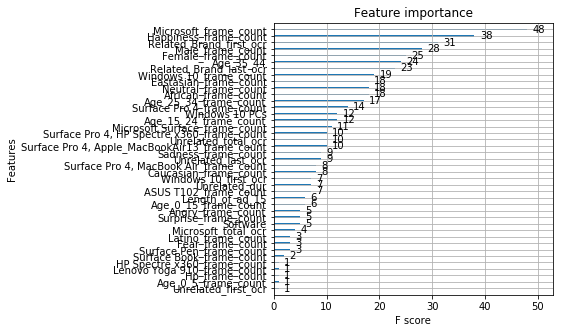

Q_34_Credibility_of_Information__Mean
R2_SCORE: 0.948747
R2_SCORE: 0.827605


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


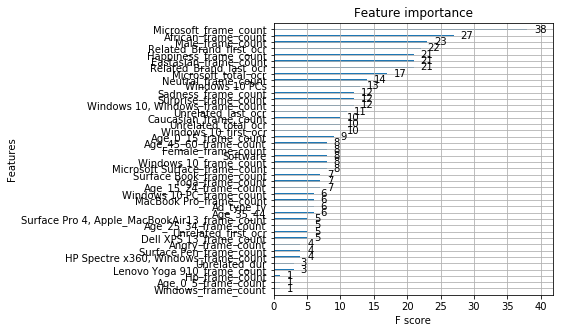

Q_35_New_Information__Mean.1
R2_SCORE: 0.974122
R2_SCORE: 0.904064


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


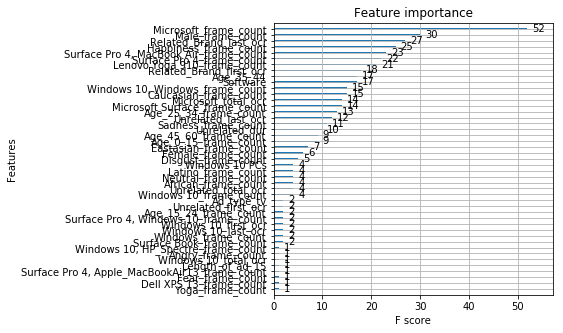

Q_36_Brand_Difference__Mean
R2_SCORE: 0.980269
R2_SCORE: 0.887452


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


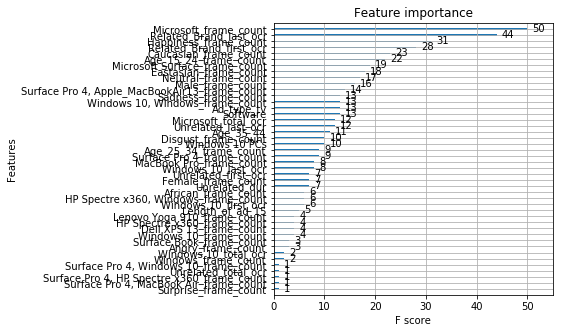

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

for i in range(len(resamp_target_df.columns)):
    try:
        print(resamp_target_df.columns[i])
        X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
        data_dmatrix = xgb.DMatrix(data=X,label=y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
        
        xg_reg = xgb.XGBRegressor(params =training_params[i])
        ####  
#         xg_reg.set_params()
#             print("Search starts")
#             hyper_tuning = GridSearchCV(xg_reg,param_grid=parameters_learning,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#             hyper_tuning.fit(X_train,y_train)
#             print(hyper_tuning.best_params_)
#             print("Search End")
        ####
        xg_reg.fit(X_train,y_train)
        preds = xg_reg.predict(X_train)
        r2_score_train = r2_score(y_train, preds)
        print("R2_SCORE: %f" % (r2_score_train))
        preds = xg_reg.predict(X_test)
        r2_score_test = r2_score(y_test, preds)
        print("R2_SCORE: %f" % (r2_score_test))
        xgb.plot_importance(xg_reg)
        plt.rcParams['figure.figsize'] = [5, 5]
        plt.savefig(resamp_target_df.columns[i]+'.png')
        plt.show()
    except:
        print("No score for " + resamp_target_df.columns[i])
        pass

# Random Forest

In [31]:
#####
parameters={"n_estimators":[100,150,200,250,300,400,500],"max_depth":[2,3,4,5,6,8,10,11,12,13,14,15],"max_features":[0.25,0.3,0.35,0.4],"min_samples_leaf":[2,3,4,5],"bootstrap":[True,False]}

In [48]:
Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}

In [49]:
training_params_random_forest=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

Unaided_Branding
R2_SCORE: 0.996972
R2_SCORE: 0.950900
Feature ranking:
1. Related_Brand_dur (0.234016)
2. Windows 10_last_ocr (0.054767)
3. Macbook Air_dur (0.048630)
4. Macbook Air_frame_count (0.041128)
5. Related_Brand_last_ocr (0.038329)
6. Dell_frame_count (0.035252)
7. Dell_dur.1 (0.033662)
8. Hp_frame_count (0.031027)
9. HP Spectre x360, Windows_dur (0.028503)
10. HP Spectre x360, Windows_frame_count (0.027825)
11. Hp_dur.1 (0.024151)
12. Microsoft_frame_count (0.022337)
13. Ad_type_tv (0.017675)
14. Female_total_duration (0.017051)
15. Unrelated_last_ocr (0.016185)
16. Female_frame_count (0.014606)
17. Unrelated_first_ocr (0.014525)
18. Latino_total_duration (0.013812)
19. Related_Brand_first_ocr (0.012399)
20. Eastasian_total_duration (0.012292)
21. Eastasian_frame_count (0.011396)
22. Video_name (0.011259)
23. Surface Pen_dur (0.010488)
24. Unrelated_dur (0.008691)
25. Windows_frame_count (0.008232)
26. Windows 10_first_ocr (0.007876)
27. Windows_dur (0.007748)
28. Microsoft

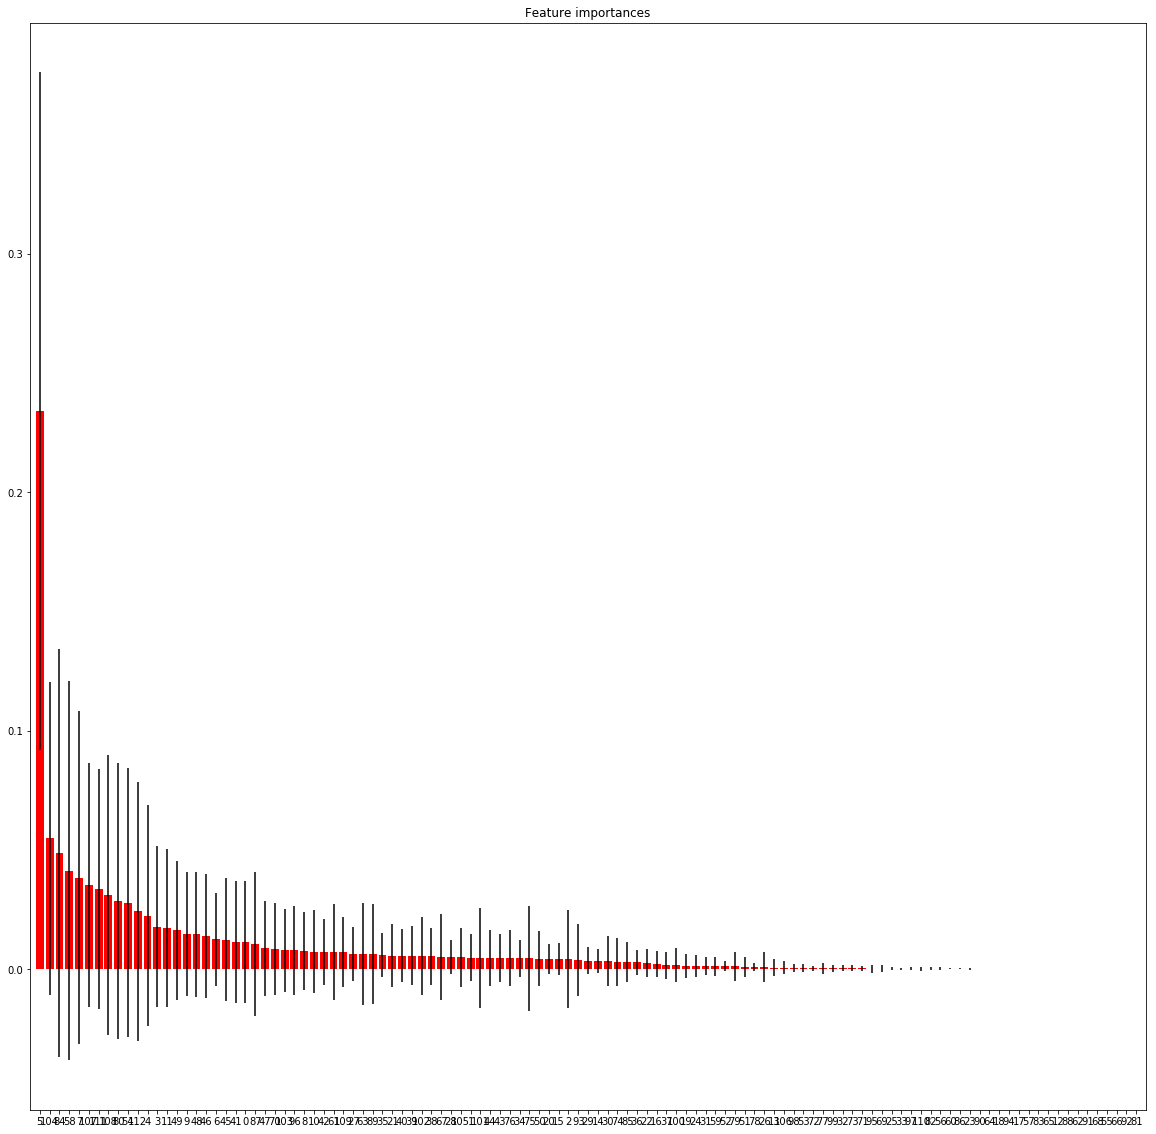

Q_12_Brand_Cues__Mean
R2_SCORE: 0.994902
R2_SCORE: 0.906014
Feature ranking:
1. Related_Brand_last_ocr (0.134821)
2. Related_Brand_first_ocr (0.075382)
3. Female_total_duration (0.074541)
4. Female_frame_count (0.066829)
5. Yoga_dur (0.042775)
6. Ad_type_tv (0.040110)
7. Latino_frame_count (0.036145)
8. Windows 10_first_ocr (0.031651)
9. Microsoft_frame_count (0.029648)
10. Surprise_total_duration (0.029319)
11. Unrelated_dur (0.020807)
12. Age_15_24_total_duration (0.020641)
13. Age_15_24_frame_count (0.019834)
14. Age_0_5_total_duration (0.014016)
15. Windows 10_total_ocr (0.013508)
16. Age_0_5_frame_count (0.013183)
17. Related_Brand_dur (0.013123)
18. Unrelated_total_ocr (0.012308)
19. Happiness_total_duration (0.012244)
20. Happiness_frame_count (0.011938)
21. Lenovo_frame_count (0.010944)
22. Yoga_frame_count (0.010799)
23. Fear_frame_count (0.010616)
24. Unrelated_first_ocr (0.010357)
25. Latino_total_duration (0.010291)
26. Fear_total_duration (0.009691)
27. ASUS T102_dur (0.00

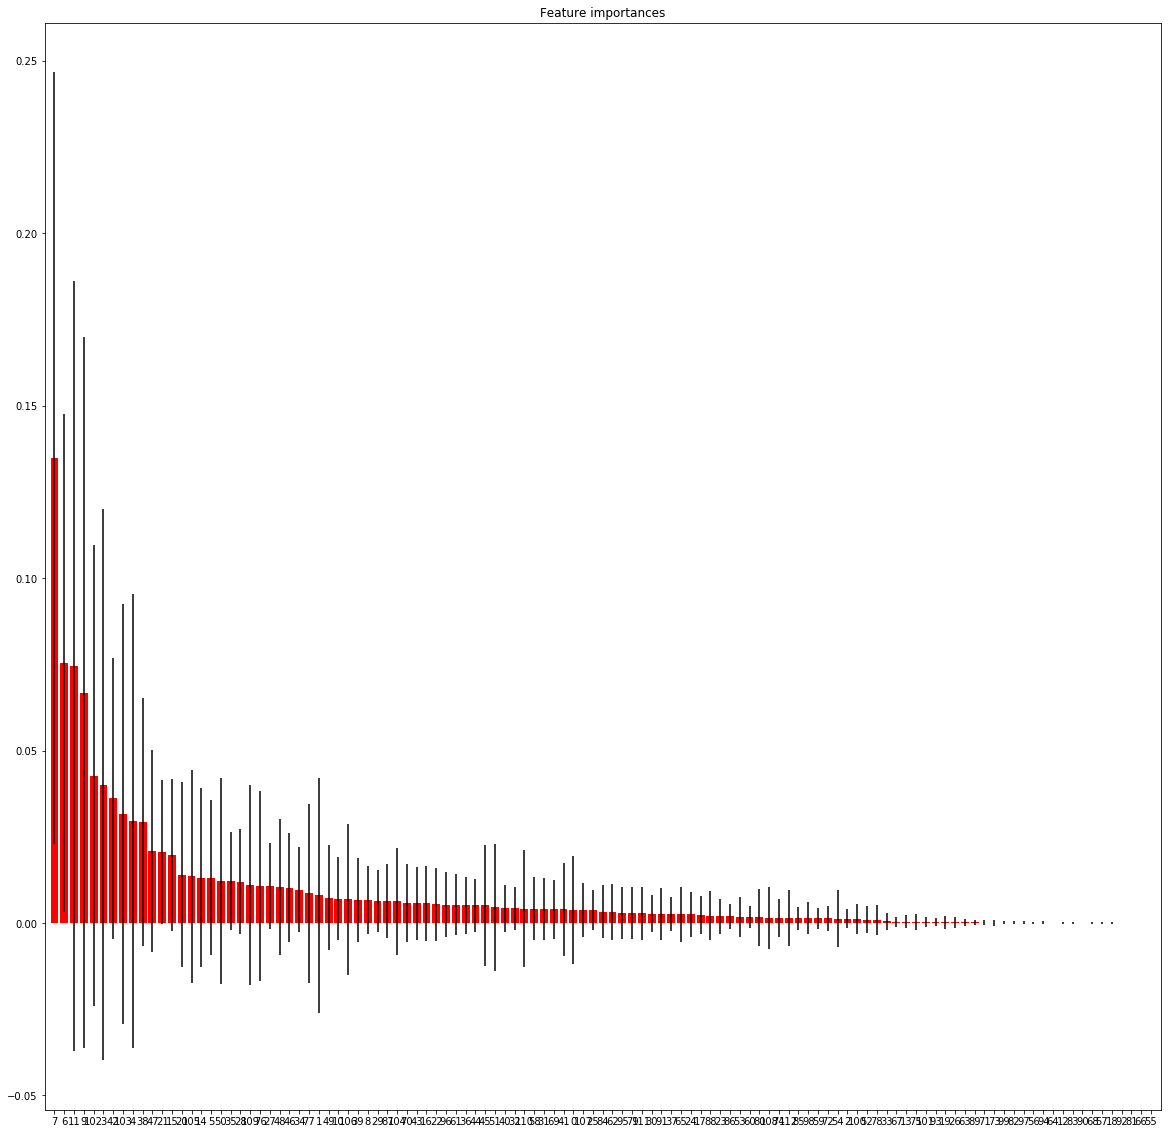

Q_11a_Aided_Branding__Mean
R2_SCORE: 0.995334
R2_SCORE: 0.917539
Feature ranking:
1. Related_Brand_last_ocr (0.094016)
2. Related_Brand_first_ocr (0.058747)
3. Female_total_duration (0.037191)
4. HP Spectre x360_dur (0.032039)
5. Asus_dur.1 (0.031398)
6. Yoga_frame_count (0.030030)
7. Female_frame_count (0.029539)
8. Fear_frame_count (0.027906)
9. Fear_total_duration (0.027467)
10. HP Spectre x360_frame_count (0.026701)
11. Windows 10_total_ocr (0.026127)
12. ASUS T102_dur (0.023991)
13. ASUS T102_frame_count (0.023302)
14. Asus_frame_count (0.022616)
15. Unrelated_total_ocr (0.022531)
16. Lenovo_frame_count (0.020103)
17. Windows_frame_count (0.019534)
18. Age_25_34_total_duration (0.019043)
19. Windows_dur (0.017436)
20. Windows 10_last_ocr (0.017320)
21. Age_25_34_frame_count (0.017316)
22. Microsoft_total_ocr (0.015940)
23. Age_15_24_frame_count (0.013642)
24. Ad_type_tv (0.011659)
25. Video_name (0.011566)
26. Macbook Air_frame_count (0.011423)
27. Happiness_frame_count (0.011149)

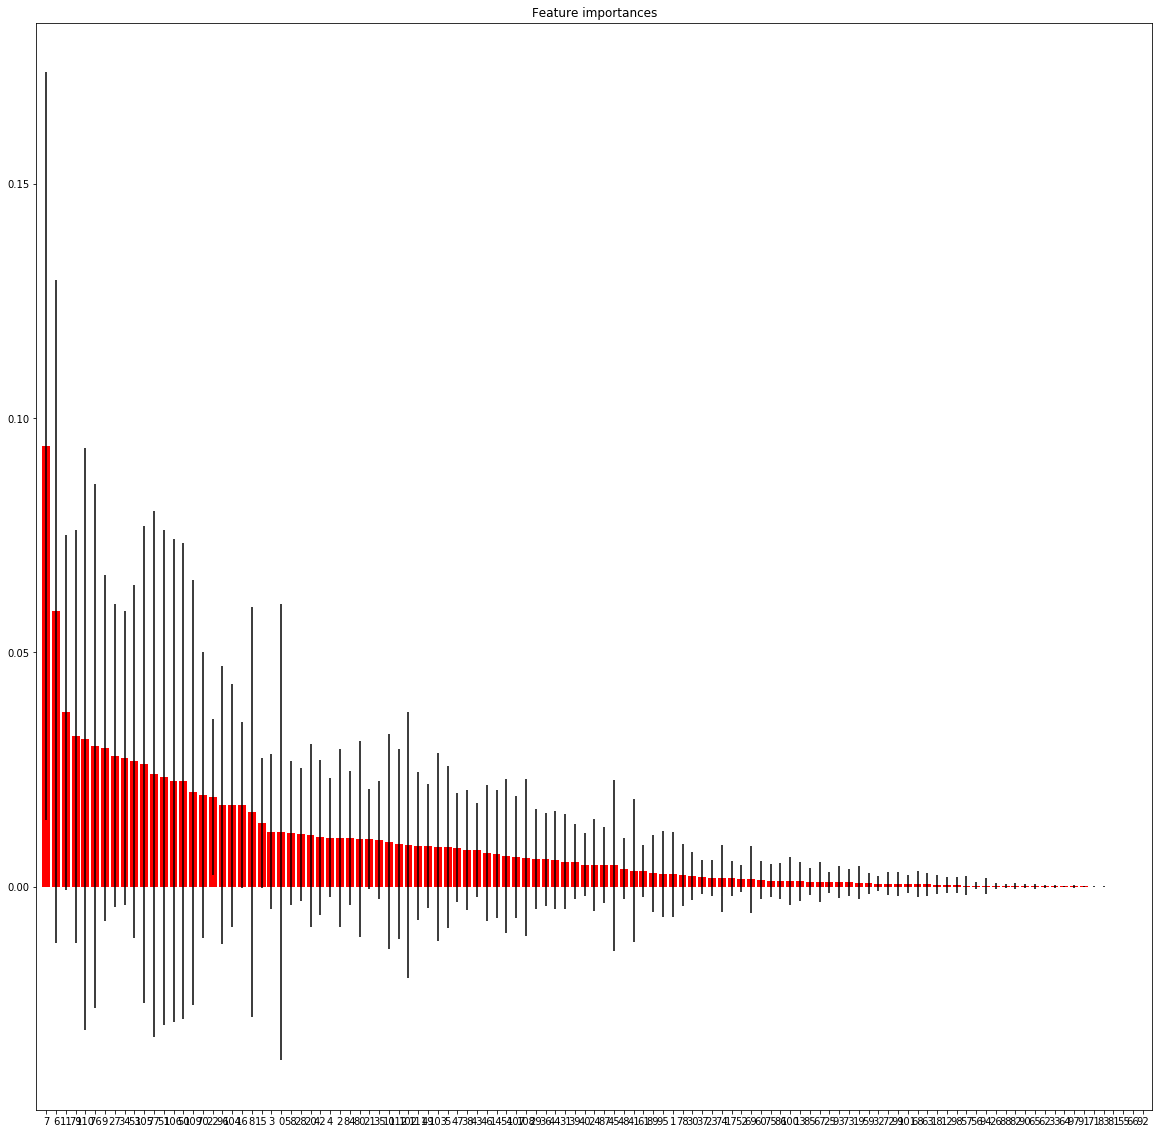

Q_7_8_9_Active_Involvement__Mean
R2_SCORE: 0.996769
R2_SCORE: 0.956237
Feature ranking:
1. Video_name (0.097340)
2. Related_Brand_first_ocr (0.073748)
3. Windows_frame_count (0.063049)
4. Windows_dur (0.062842)
5. Software (0.062158)
6. Windows 10_last_ocr (0.039496)
7. Related_Brand_dur (0.034398)
8. African_frame_count (0.032720)
9. Caucasian_total_duration (0.030270)
10. Latino_frame_count (0.030055)
11. Surprise_total_duration (0.029482)
12. Yoga_dur (0.029083)
13. Windows 10_first_ocr (0.028438)
14. African_total_duration (0.027613)
15. Ad_type_tv (0.024181)
16. Microsoft_frame_count (0.022693)
17. Caucasian_frame_count (0.021574)
18. Neutral_frame_count (0.016252)
19. Neutral_total_duration (0.015825)
20. Microsoft_total_ocr (0.015605)
21. Female_frame_count (0.014769)
22. Female_total_duration (0.013167)
23. Male_frame_count (0.012993)
24. Age_25_34_frame_count (0.012961)
25. Age_25_34_total_duration (0.012824)
26. Happiness_total_duration (0.012556)
27. Latino_total_duration (0

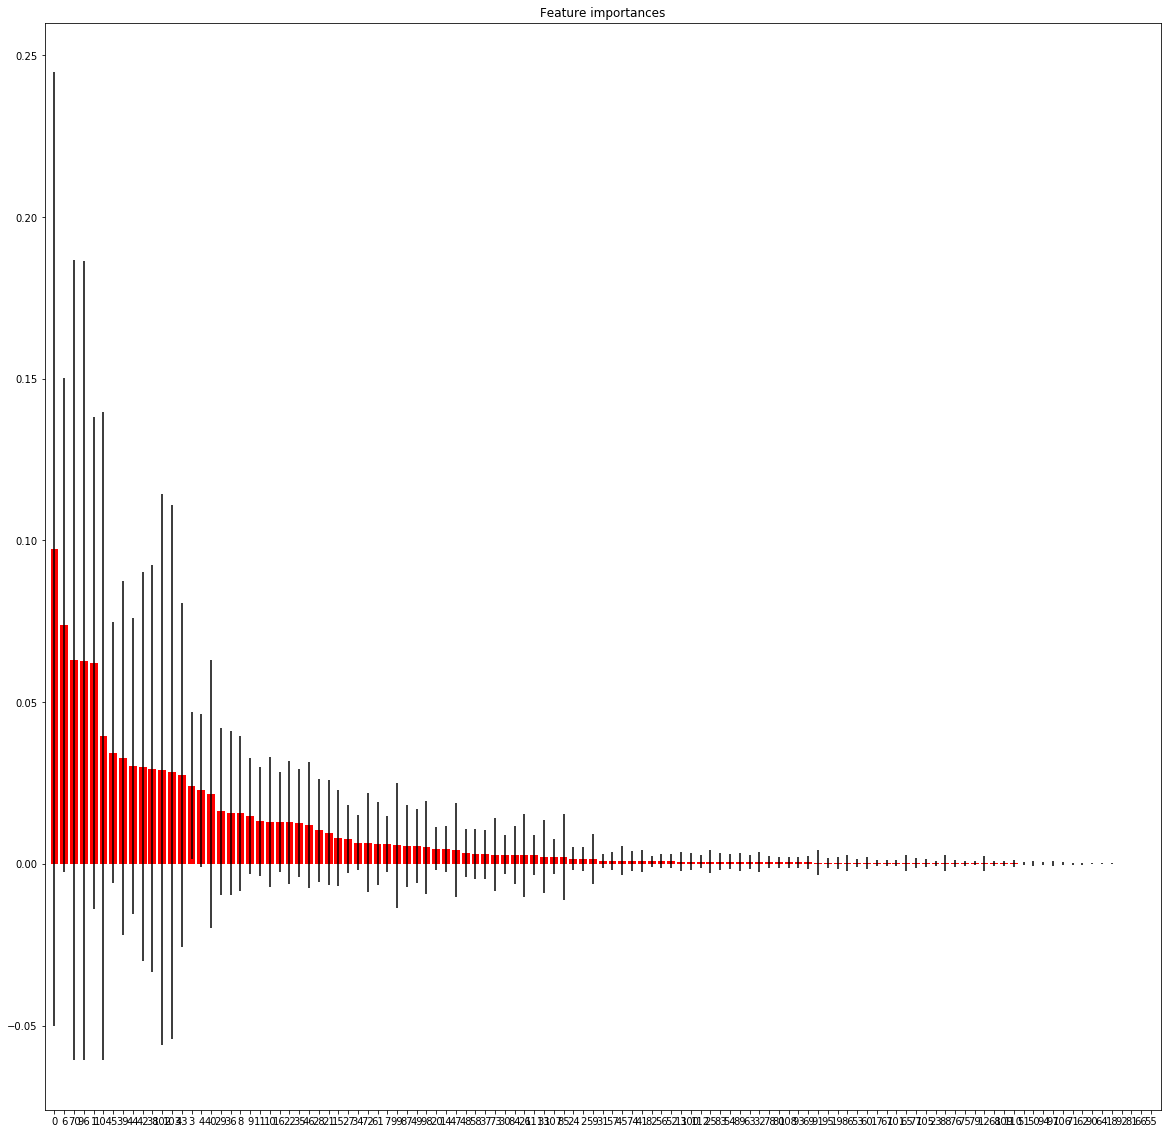

Q_35_New_Information__Mean
R2_SCORE: 0.996007
R2_SCORE: 0.927429
Feature ranking:
1. Related_Brand_first_ocr (0.206646)
2. Video_name (0.090743)
3. African_frame_count (0.056567)
4. Software (0.054704)
5. African_total_duration (0.039402)
6. Windows 10_first_ocr (0.036450)
7. Windows_dur (0.030981)
8. Yoga_dur (0.027536)
9. Windows 10_last_ocr (0.023910)
10. Surface Pen_frame_count (0.023343)
11. Surface Pen_dur (0.022762)
12. Windows_frame_count (0.022572)
13. Microsoft Surface_dur (0.019198)
14. Macbook Air_dur (0.016973)
15. Microsoft Surface_frame_count (0.015266)
16. Female_total_duration (0.014821)
17. Female_frame_count (0.014666)
18. Related_Brand_dur (0.014369)
19. Related_Brand_last_ocr (0.013778)
20. Age_25_34_total_duration (0.012241)
21. Microsoft_total_ocr (0.011553)
22. Age_25_34_frame_count (0.011518)
23. Male_frame_count (0.011182)
24. Macbook Air_frame_count (0.011125)
25. Caucasian_total_duration (0.010938)
26. Unrelated_dur (0.010763)
27. Caucasian_frame_count (0.01

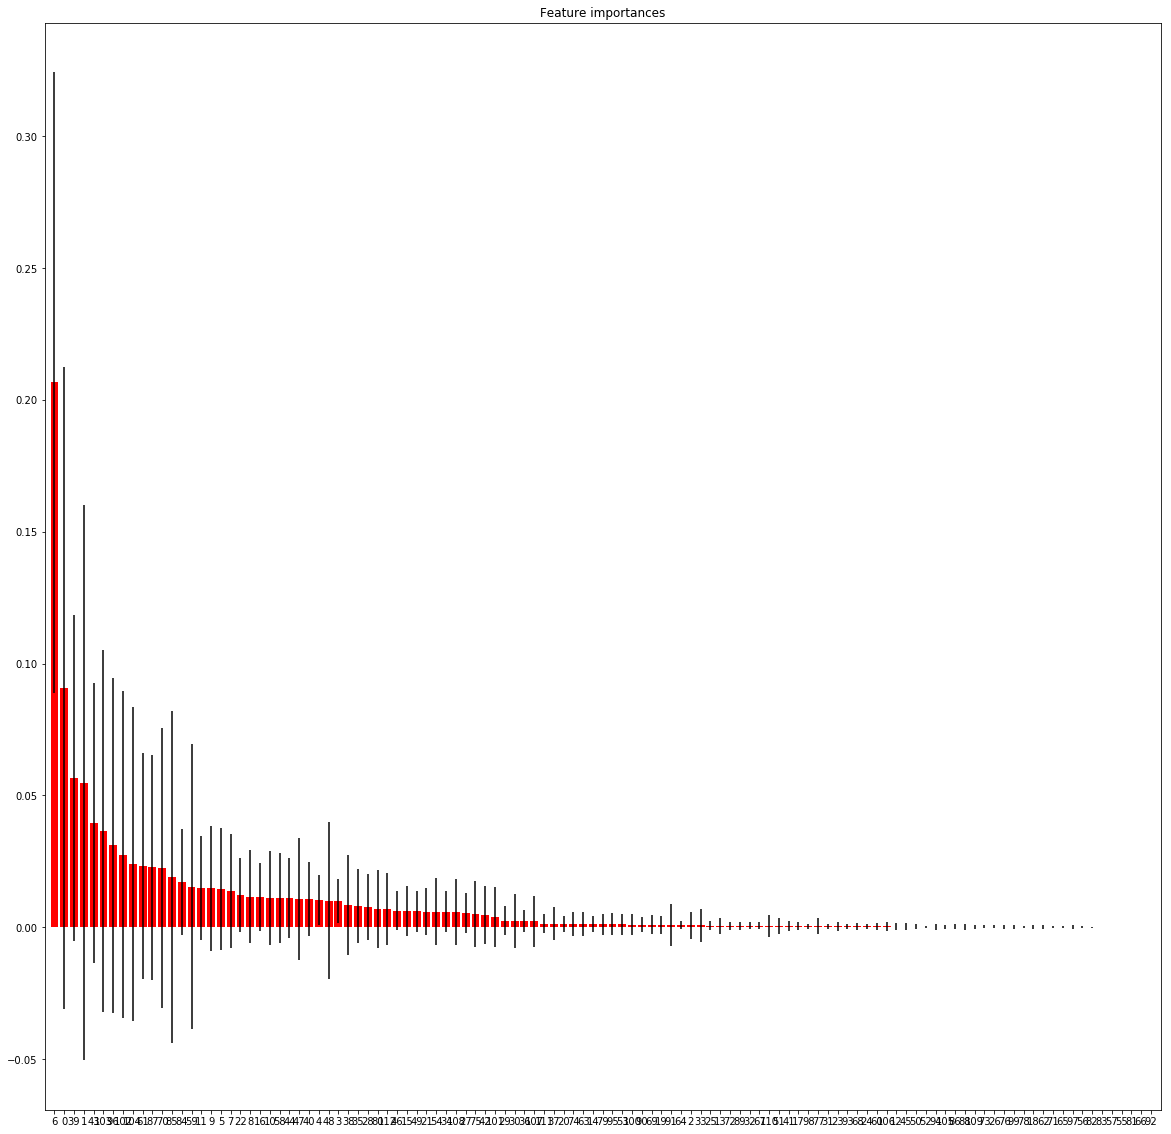

Q_6_Enjoyment__Mean
R2_SCORE: 0.997118
R2_SCORE: 0.878826
Feature ranking:
1. Related_Brand_first_ocr (0.185651)
2. Software (0.165558)
3. Related_Brand_dur (0.070633)
4. Microsoft Surface_frame_count (0.047289)
5. Microsoft Surface_dur (0.039975)
6. Unrelated_first_ocr (0.035677)
7. African_frame_count (0.029108)
8. Unrelated_dur (0.027922)
9. African_total_duration (0.024806)
10. Age_15_24_frame_count (0.017612)
11. Age_15_24_total_duration (0.016663)
12. Surface Pen_dur (0.016110)
13. Age_25_34_total_duration (0.015665)
14. Surface Pen_frame_count (0.014546)
15. Age_25_34_frame_count (0.013383)
16. Windows_frame_count (0.012831)
17. Fear_frame_count (0.012240)
18. Related_Brand_last_ocr (0.011186)
19. Fear_total_duration (0.010353)
20. Female_total_duration (0.010027)
21. Windows_dur (0.009988)
22. Happiness_total_duration (0.008638)
23. Happiness_frame_count (0.008310)
24. Yoga_dur (0.008229)
25. Female_frame_count (0.007778)
26. Caucasian_total_duration (0.007287)
27. Microsoft_fr

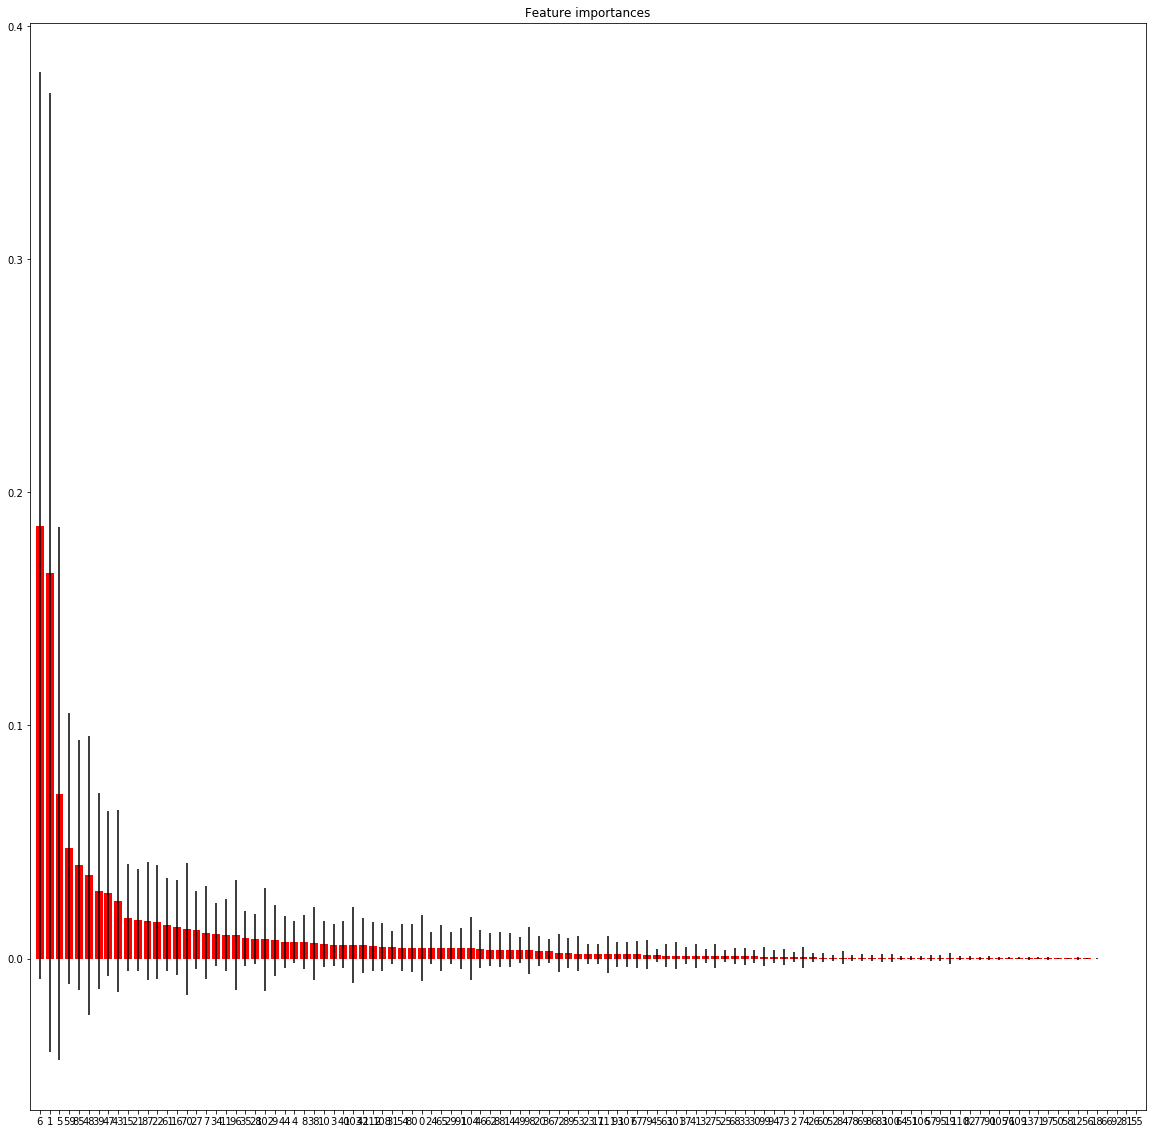

Q_20_Brand_Appeal__Mean
R2_SCORE: 0.998107
R2_SCORE: 0.913867
Feature ranking:
1. Related_Brand_first_ocr (0.209016)
2. Software (0.099476)
3. Video_name (0.051413)
4. Microsoft Surface_dur (0.046556)
5. Microsoft Surface_frame_count (0.046360)
6. African_frame_count (0.030373)
7. African_total_duration (0.030172)
8. Related_Brand_dur (0.026630)
9. Surface Pen_frame_count (0.022921)
10. Female_frame_count (0.022347)
11. Female_total_duration (0.021204)
12. Surface Pen_dur (0.020468)
13. Unrelated_first_ocr (0.017211)
14. Windows 10_first_ocr (0.016174)
15. Fear_total_duration (0.015303)
16. Microsoft_frame_count (0.014803)
17. Windows 10_last_ocr (0.014705)
18. Surprise_total_duration (0.013473)
19. Fear_frame_count (0.013254)
20. Yoga_dur (0.012725)
21. Windows_dur (0.011687)
22. Latino_frame_count (0.011519)
23. Ad_type_tv (0.011500)
24. Age_25_34_total_duration (0.011222)
25. Age_25_34_frame_count (0.010719)
26. Surface pro 4_dur (0.008703)
27. Windows_frame_count (0.008201)
28. Cau

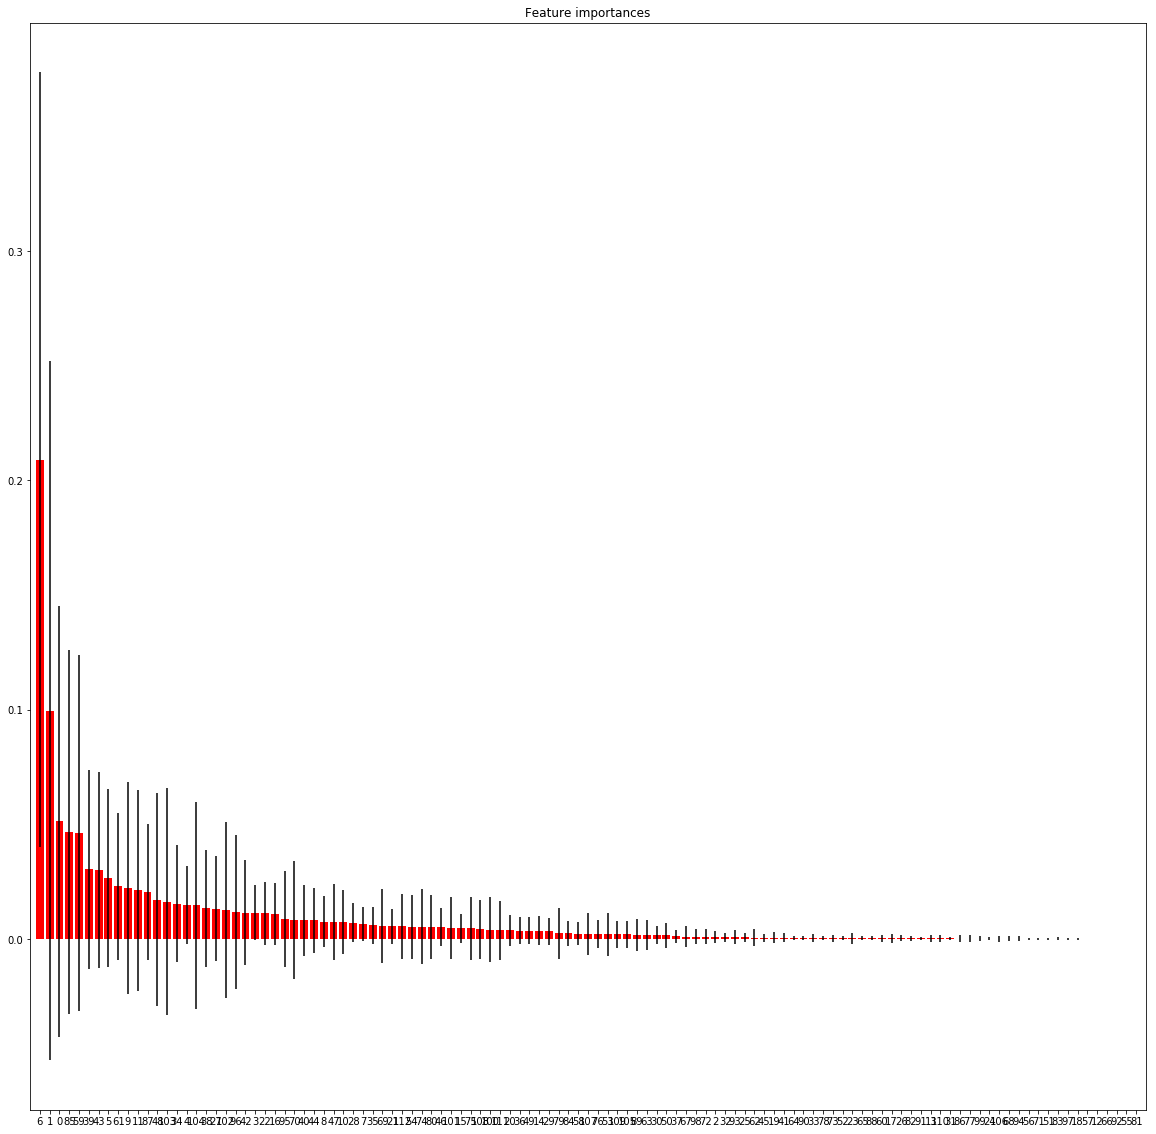

Q_32_Understanding__Mean
R2_SCORE: 0.996380
R2_SCORE: 0.898368
Feature ranking:
1. Female_frame_count (0.088639)
2. Female_total_duration (0.073367)
3. Surface pro 4_dur (0.045242)
4. Yoga_dur (0.043100)
5. Microsoft_frame_count (0.043086)
6. Surface pro 4_frame_count (0.039268)
7. Windows 10, HP_Spectre_dur (0.039206)
8. Ad_type_tv (0.037232)
9. Windows 10, HP_Spectre_frame_count (0.034591)
10. Related_Brand_dur (0.029245)
11. Related_Brand_first_ocr (0.028766)
12. Related_Brand_last_ocr (0.024681)
13. Age_0_5_total_duration (0.018776)
14. Fear_total_duration (0.018319)
15. Happiness_frame_count (0.018139)
16. Surprise_total_duration (0.017577)
17. HP Spectre x360_dur (0.017001)
18. HP Spectre x360_frame_count (0.014959)
19. Surface Pen_frame_count (0.014554)
20. Happiness_total_duration (0.014522)
21. Age_0_5_frame_count (0.014291)
22. Fear_frame_count (0.014219)
23. Surface Pen_dur (0.012741)
24. Sadness_total_duration (0.012250)
25. Age_15_24_frame_count (0.011176)
26. Age_15_24_to

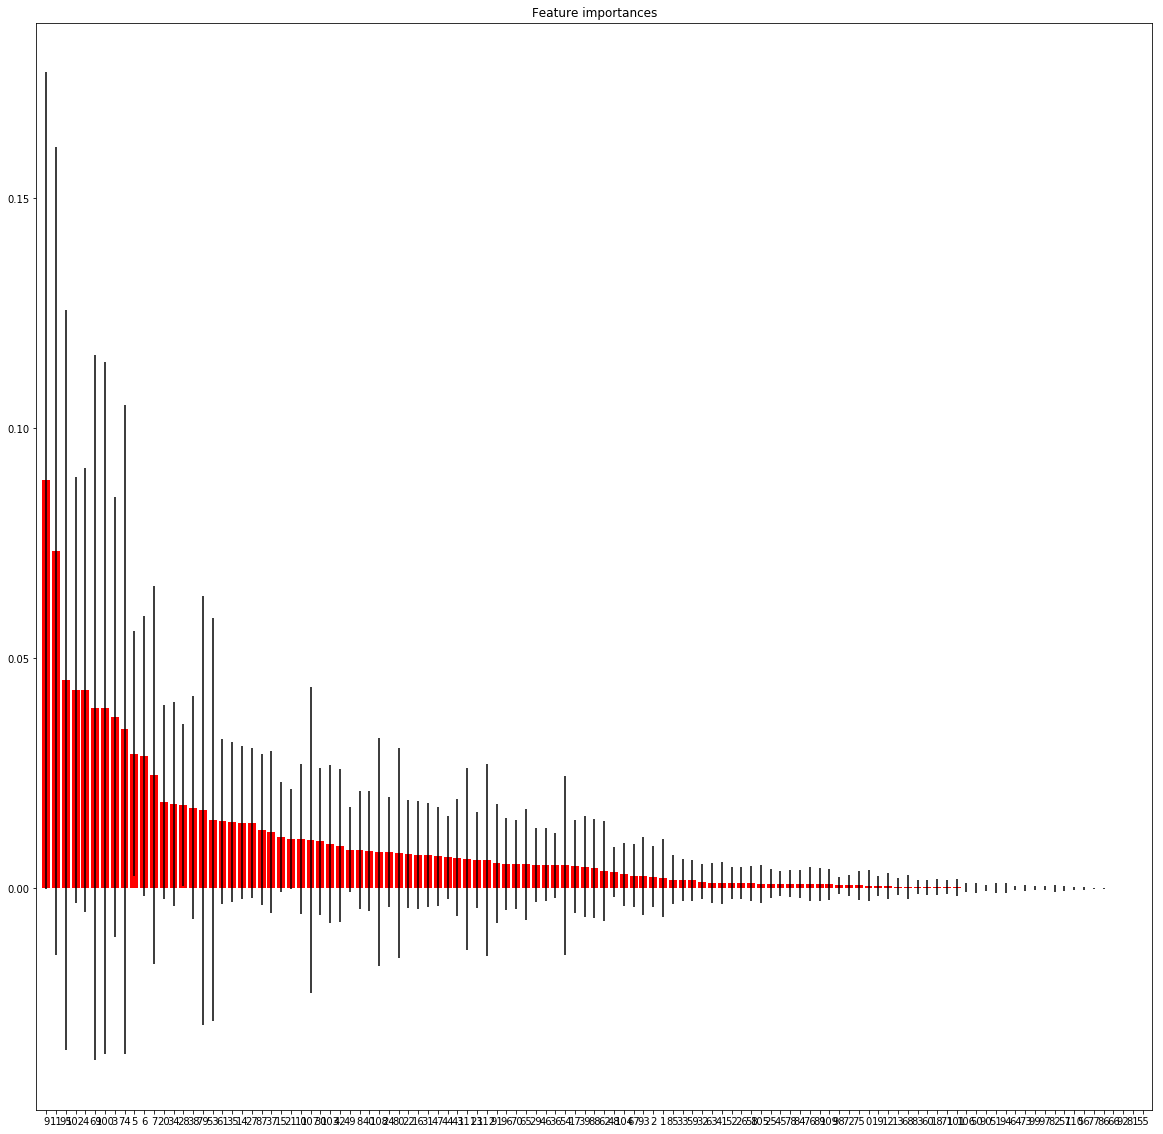

Q_33_Relevance_of_Information__Mean
R2_SCORE: 0.995580
R2_SCORE: 0.889407
Feature ranking:
1. Related_Brand_first_ocr (0.124290)
2. Related_Brand_dur (0.070198)
3. Software (0.050971)
4. Fear_total_duration (0.044600)
5. Unrelated_first_ocr (0.042192)
6. Fear_frame_count (0.038742)
7. Female_frame_count (0.032925)
8. Windows 10_total_ocr (0.027912)
9. Female_total_duration (0.026224)
10. Yoga_dur (0.025565)
11. Windows 10_first_ocr (0.022881)
12. Unrelated_total_ocr (0.021260)
13. Age_0_5_total_duration (0.020488)
14. Yoga_frame_count (0.019527)
15. Age_25_34_total_duration (0.019297)
16. Age_15_24_frame_count (0.019003)
17. Age_15_24_total_duration (0.018644)
18. Age_0_5_frame_count (0.018387)
19. Microsoft_frame_count (0.017965)
20. Happiness_total_duration (0.017374)
21. African_total_duration (0.016519)
22. Latino_total_duration (0.015560)
23. Age_25_34_frame_count (0.015391)
24. Male_frame_count (0.015185)
25. Happiness_frame_count (0.014507)
26. African_frame_count (0.013604)
27.

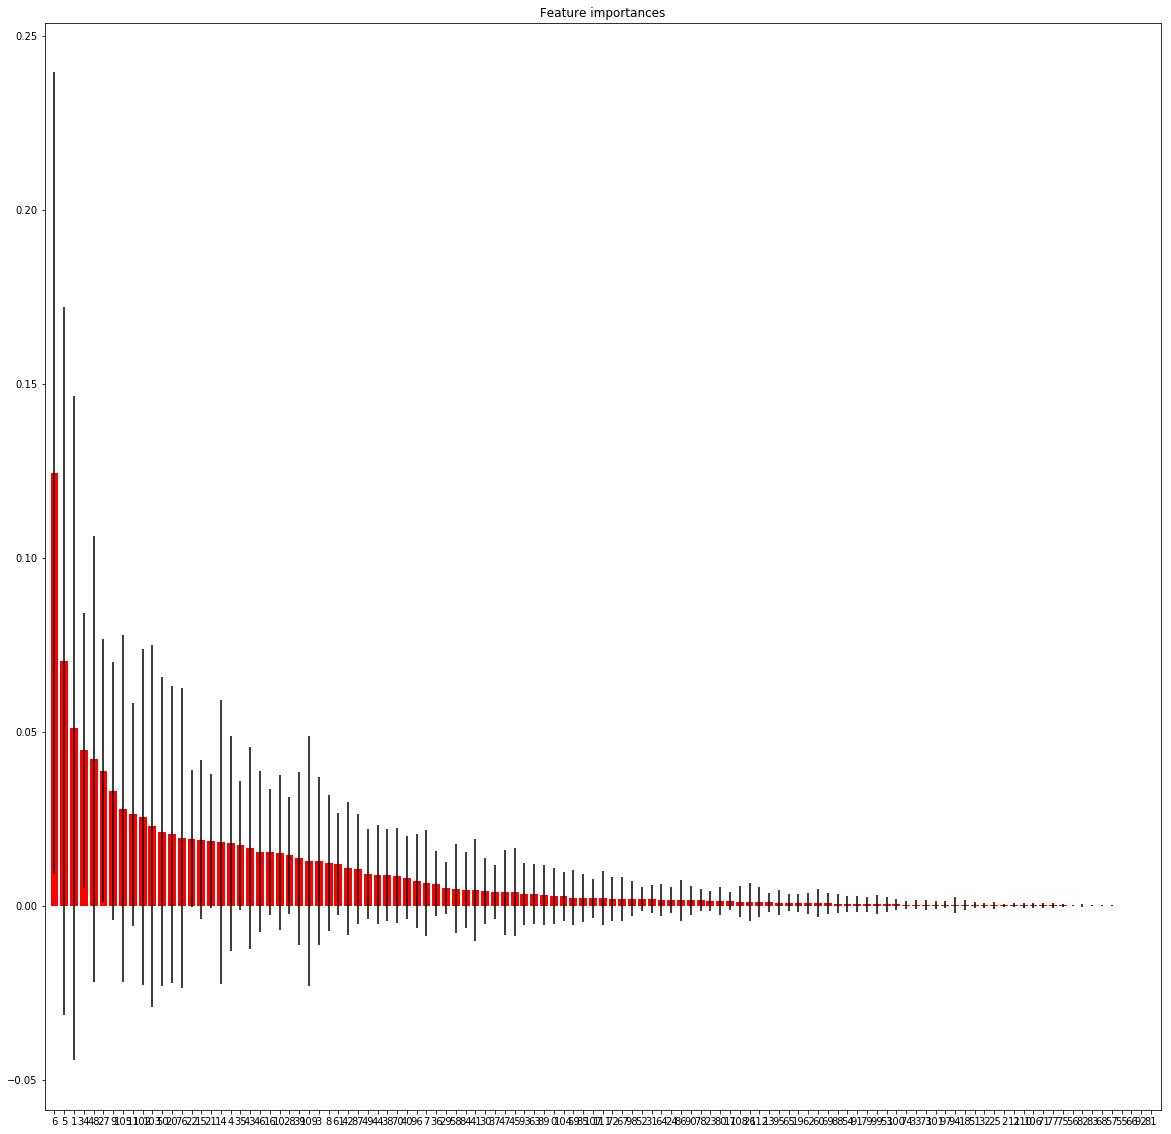

Q_34_Credibility_of_Information__Mean
R2_SCORE: 0.994717
R2_SCORE: 0.913745
Feature ranking:
1. Related_Brand_first_ocr (0.096587)
2. Windows 10, HP_Spectre_dur (0.063841)
3. Related_Brand_last_ocr (0.053119)
4. Unrelated_first_ocr (0.050571)
5. Windows 10, HP_Spectre_frame_count (0.044784)
6. Ad_type_tv (0.039193)
7. Microsoft_frame_count (0.030942)
8. Female_total_duration (0.030817)
9. Female_frame_count (0.028404)
10. Unrelated_dur (0.022753)
11. Happiness_frame_count (0.020640)
12. Latino_total_duration (0.019903)
13. African_total_duration (0.019123)
14. Happiness_total_duration (0.018524)
15. Surface pro 4_dur (0.017373)
16. Related_Brand_dur (0.017263)
17. Unrelated_last_ocr (0.016846)
18. Fear_total_duration (0.016612)
19. Fear_frame_count (0.015959)
20. African_frame_count (0.015805)
21. Yoga_dur (0.015171)
22. Age_15_24_total_duration (0.013918)
23. HP Spectre x360_dur (0.013797)
24. Age_15_24_frame_count (0.013735)
25. HP Spectre x360_frame_count (0.011056)
26. Surface pro 

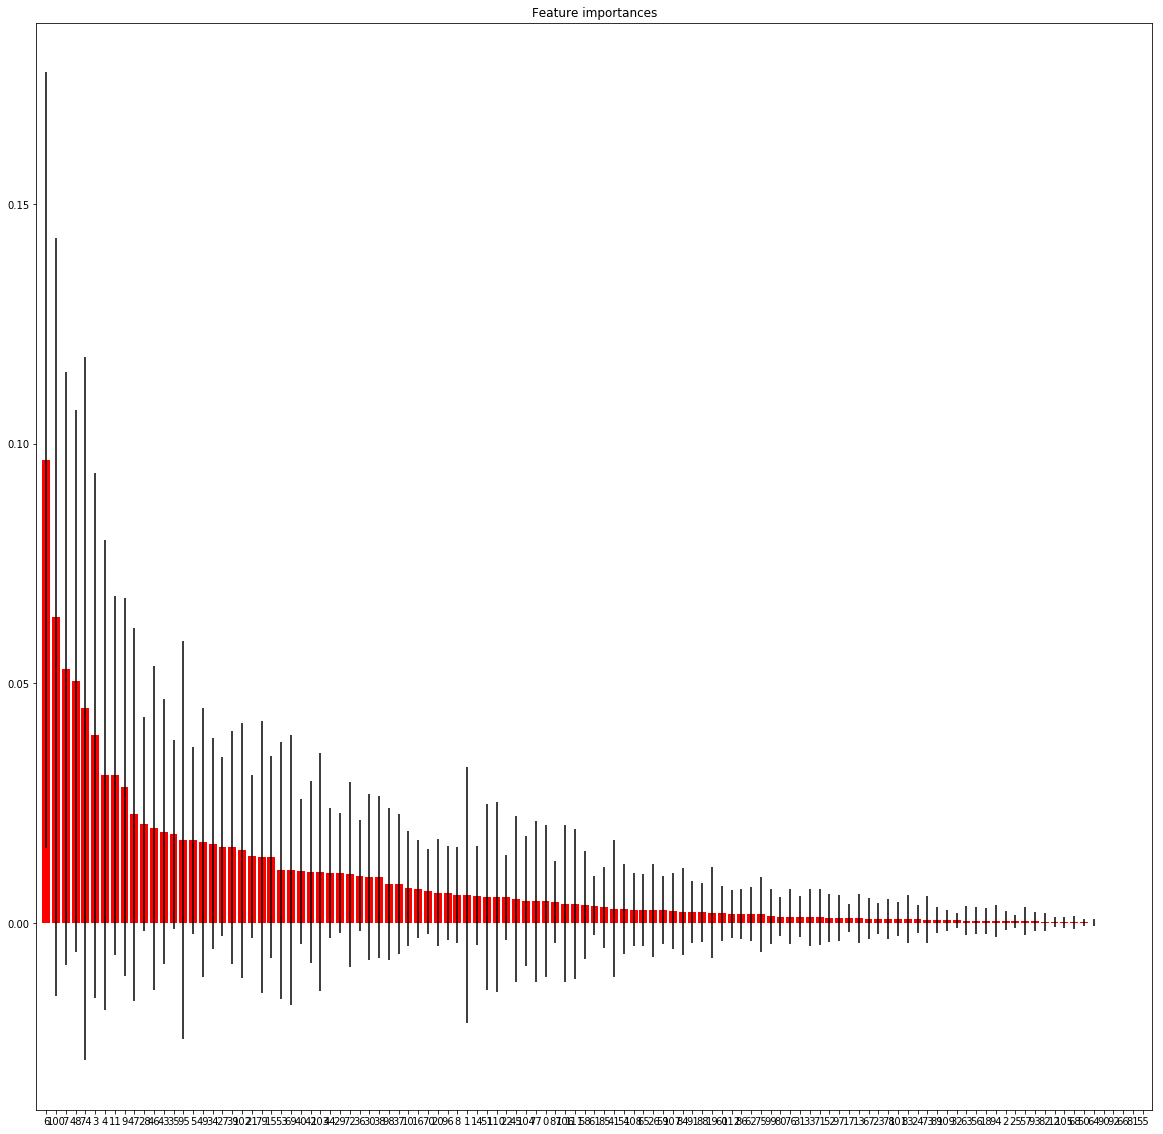

Q_35_New_Information__Mean.1
R2_SCORE: 0.996156
R2_SCORE: 0.929538
Feature ranking:
1. Related_Brand_first_ocr (0.196658)
2. Video_name (0.093207)
3. Software (0.058880)
4. African_total_duration (0.045853)
5. African_frame_count (0.045008)
6. Windows 10_first_ocr (0.036939)
7. Windows 10_last_ocr (0.033913)
8. Windows_dur (0.031491)
9. Surface Pen_frame_count (0.025418)
10. Surface Pen_dur (0.022475)
11. Yoga_dur (0.021805)
12. Windows_frame_count (0.019961)
13. Microsoft Surface_frame_count (0.017436)
14. Microsoft Surface_dur (0.016057)
15. Macbook Air_dur (0.016043)
16. Female_frame_count (0.015998)
17. Related_Brand_dur (0.015452)
18. Macbook Air_frame_count (0.013822)
19. Age_25_34_frame_count (0.013381)
20. Female_total_duration (0.013085)
21. Related_Brand_last_ocr (0.013033)
22. Unrelated_dur (0.012389)
23. Unrelated_first_ocr (0.011849)
24. Ad_type_tv (0.011748)
25. Age_25_34_total_duration (0.011260)
26. Microsoft_frame_count (0.010689)
27. Caucasian_total_duration (0.009490

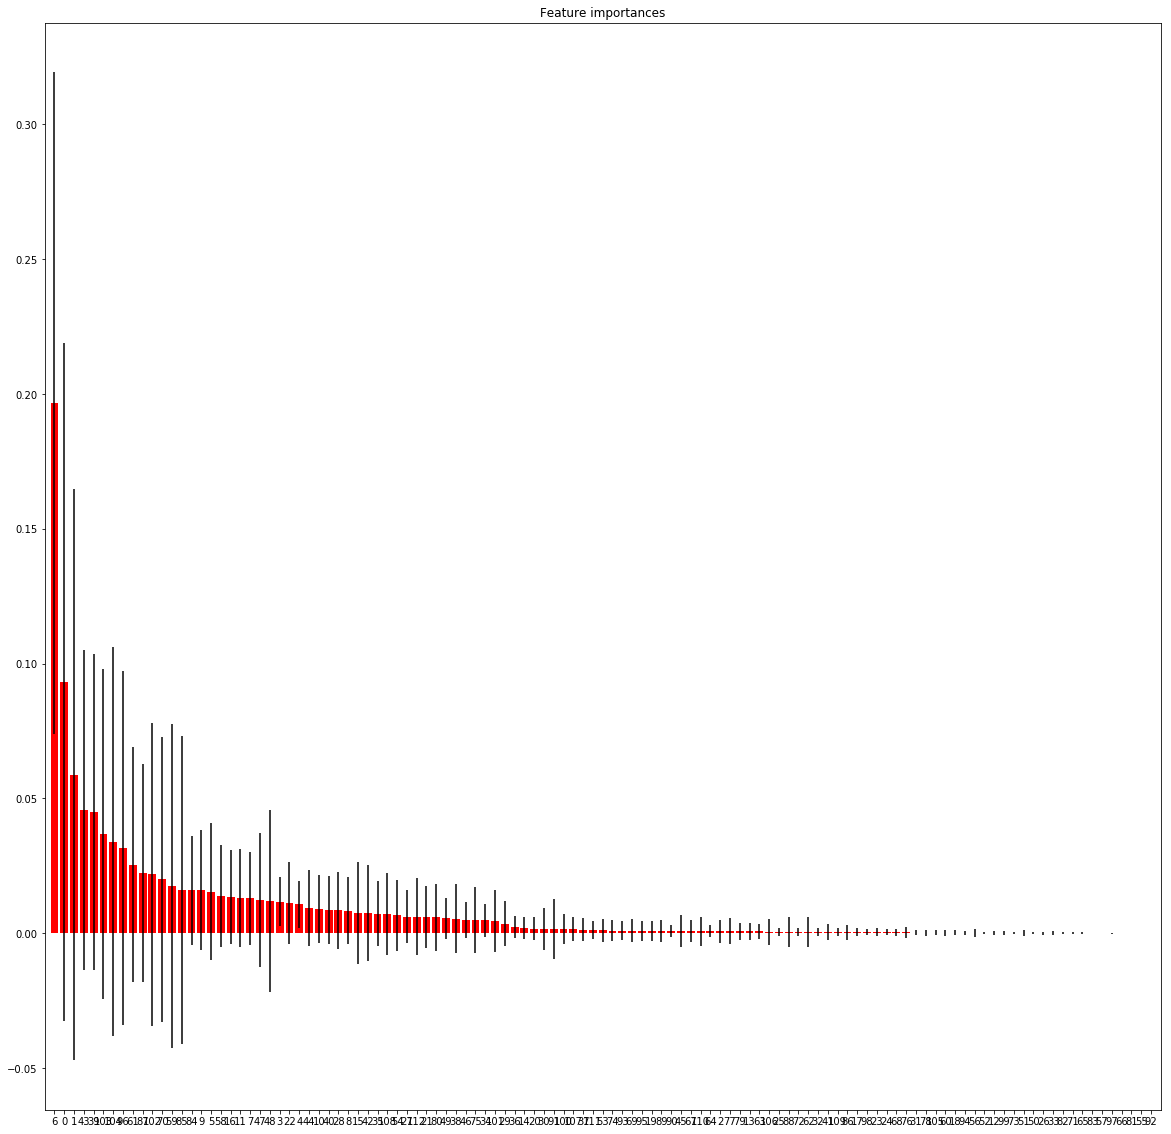

Q_36_Brand_Difference__Mean
R2_SCORE: 0.998094
R2_SCORE: 0.917858
Feature ranking:
1. Related_Brand_first_ocr (0.228117)
2. Software (0.112392)
3. African_total_duration (0.059055)
4. African_frame_count (0.048192)
5. Related_Brand_dur (0.038725)
6. Windows 10_first_ocr (0.032865)
7. Yoga_dur (0.030515)
8. Windows 10_last_ocr (0.023680)
9. Video_name (0.023621)
10. Windows_dur (0.021042)
11. Windows_frame_count (0.018257)
12. Microsoft Surface_dur (0.013809)
13. Surface Pro 4, MacBook Air_frame_count (0.012533)
14. Macbook Air_frame_count (0.011870)
15. Related_Brand_last_ocr (0.011369)
16. Macbook Air_dur (0.010745)
17. Age_0_5_frame_count (0.010433)
18. Microsoft Surface_frame_count (0.010219)
19. Latino_frame_count (0.009994)
20. Surface Pro 4_dur (0.009739)
21. Unrelated_dur (0.009718)
22. Caucasian_frame_count (0.009633)
23. Age_0_5_total_duration (0.009534)
24. Fear_frame_count (0.008985)
25. Caucasian_total_duration (0.008959)
26. Surface Pro 4, MacBook Air_dur (0.008920)
27. Ag

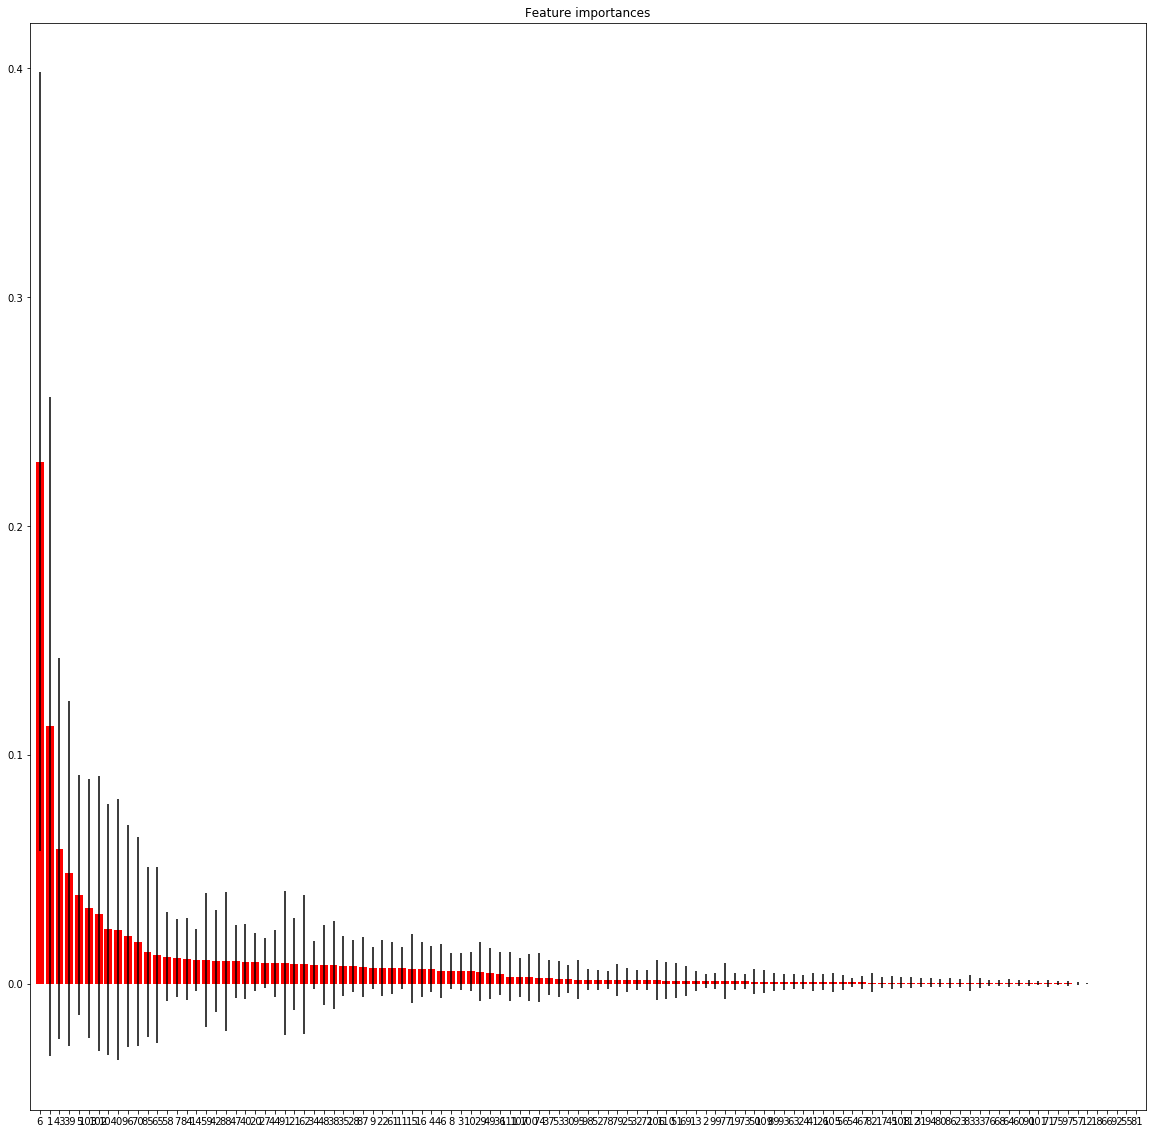

In [60]:

for i in range(len(resamp_target_df.columns)):
    print(resamp_target_df.columns[i])
    X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    forest = RandomForestRegressor()
    forest.set_params(**training_params_random_forest[i])
    #### Grid Search CV
#     print("Search starts")
#     hyper_tuning = GridSearchCV(forest,param_grid=parameters,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#     hyper_tuning.fit(X_train,y_train)
#     print(hyper_tuning.best_params_)
#     print("Search End")
    ####
    forest.fit(X_train, y_train)
    preds = forest.predict(X_train)
    r2_score_train = r2_score(y_train, preds)
    print("R2_SCORE: %f" % (r2_score_train))
    preds = forest.predict(X_test)
    r2_score_test = r2_score(y_test, preds)
    print("R2_SCORE: %f" % (r2_score_test))
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, resamp_inputs_df.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(20,20))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.savefig(resamp_target_df.columns[i]+'_rf'+'.png')
    plt.show()

# Decision Tree

In [21]:
parameters_tree={"max_depth":[2,3,4,5,6,8,10,11,12,13,14,15],"min_samples_leaf":[2,3,4,5,6],"max_features":[0.25,0.3,0.35,0.4]}

In [61]:
Unaided_Branding_params = {'max_depth': 8, 'max_features': 0.4, 'min_samples_leaf': 2}
Brand_mean_cues_params = {'max_depth': 8, 'max_features': 0.35, 'min_samples_leaf': 2}
Aided_Branding__Mean_params ={'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2}
Active_Involvement__Mean_params = {'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 3}
New_Information__Mean_params = {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
Enjoyment__Mean_params= {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
Brand_Appeal__Mean_params = {'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 2}
Understanding__Mean_params = {'max_depth': 12, 'max_features': 0.35, 'min_samples_leaf': 2}
Relevance_of_Information__Mean_params = {'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 2}
Credibility_of_Information__Mean_params = {'max_depth': 10, 'max_features': 0.25, 'min_samples_leaf': 2}
Brand_Difference__Mean_params= {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}

In [62]:
training_params_decision_tree=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

Unaided_Branding
R2_SCORE: 0.974672
R2_SCORE: 0.819995
Feature ranking:
1. Related_Brand_dur (0.329666)
2. Windows 10_last_ocr (0.184444)
3. Video_name (0.139670)
4. Unrelated_last_ocr (0.086557)
5. Windows 10_first_ocr (0.043070)
6. Female_total_duration (0.034769)
7. Related_Brand_last_ocr (0.024976)
8. Microsoft_frame_count (0.020354)
9. Caucasian_total_duration (0.016723)
10. HP Spectre x360, Windows_frame_count (0.016296)
11. Windows_dur (0.013941)
12. Sadness_total_duration (0.013099)
13. African_total_duration (0.010299)
14. Neutral_frame_count (0.009415)
15. Age_25_34_total_duration (0.007576)
16. Female_frame_count (0.006875)
17. Macbook Air_dur (0.006765)
18. Related_Brand_first_ocr (0.006739)
19. Age_0_5_total_duration (0.005439)
20. HP Spectre x360, Windows_dur (0.003570)
21. Age_15_24_frame_count (0.003341)
22. Caucasian_frame_count (0.003097)
23. Surface Pen_dur (0.002906)
24. Angry_frame_count (0.002825)
25. Neutral_total_duration (0.001978)
26. Fear_total_duration (0.00

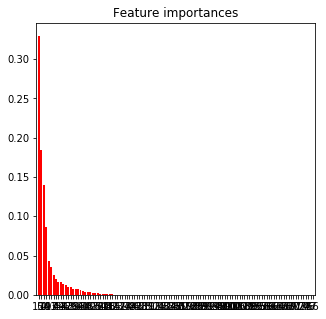

Q_12_Brand_Cues__Mean
R2_SCORE: 0.965348
R2_SCORE: 0.741302
Feature ranking:
1. Female_total_duration (0.301681)
2. Yoga_dur (0.114447)
3. Windows 10_first_ocr (0.102168)
4. Latino_frame_count (0.073707)
5. Related_Brand_first_ocr (0.055492)
6. Ad_type_tv (0.036757)
7. Surface Pro 4_dur (0.034312)
8. Age_15_24_total_duration (0.031847)
9. Fear_total_duration (0.031833)
10. Related_Brand_dur (0.030615)
11. Neutral_frame_count (0.023801)
12. Happiness_total_duration (0.017881)
13. Caucasian_frame_count (0.017190)
14. Windows_dur (0.016303)
15. Age_25_34_frame_count (0.014408)
16. Female_frame_count (0.013909)
17. Age_35_44 (0.012997)
18. Dell_frame_count (0.011227)
19. Surprise_total_duration (0.010658)
20. Happiness_frame_count (0.009526)
21. Macbook Air_dur (0.007376)
22. Age_15_24_frame_count (0.004675)
23. Microsoft_frame_count (0.004094)
24. Male_frame_count (0.003932)
25. Neutral_total_duration (0.003743)
26. African_frame_count (0.002917)
27. Angry_frame_count (0.002819)
28. Age_0

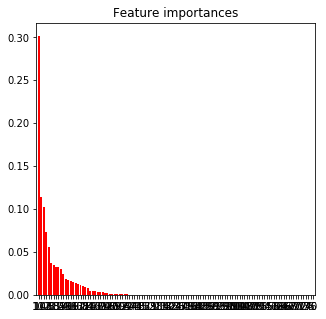

Q_11a_Aided_Branding__Mean
R2_SCORE: 0.963170
R2_SCORE: 0.897599
Feature ranking:
1. Related_Brand_last_ocr (0.196641)
2. Windows 10_total_ocr (0.104802)
3. ASUS T102_dur (0.101010)
4. HP Spectre x360_frame_count (0.085587)
5. Female_total_duration (0.060178)
6. HP Spectre x360, Windows_frame_count (0.056765)
7. Age_25_34_total_duration (0.043334)
8. Ad_type_tv (0.039875)
9. Length_of_ad_15 (0.038715)
10. Age_15_24_total_duration (0.033277)
11. Surprise_total_duration (0.030465)
12. Surprise_frame_count (0.028002)
13. Fear_total_duration (0.023623)
14. Age_15_24_frame_count (0.020544)
15. African_frame_count (0.017565)
16. Fear_frame_count (0.016007)
17. Unrelated_first_ocr (0.011934)
18. Windows 10_last_ocr (0.011688)
19. Windows_frame_count (0.009916)
20. Yoga_dur (0.008720)
21. Surface Book_frame_count (0.008445)
22. Windows_dur (0.007482)
23. Related_Brand_first_ocr (0.006901)
24. Age_35_44_total_duration (0.006525)
25. Macbook Air_frame_count (0.006524)
26. African_total_duration 

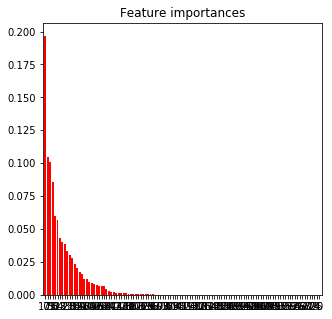

Q_7_8_9_Active_Involvement__Mean
R2_SCORE: 0.983240
R2_SCORE: 0.853372
Feature ranking:
1. Video_name (0.347412)
2. African_total_duration (0.142301)
3. Software (0.111121)
4. Related_Brand_first_ocr (0.084864)
5. Happiness_frame_count (0.077572)
6. Microsoft_total_ocr (0.047026)
7. Neutral_frame_count (0.029122)
8. Surprise_total_duration (0.026763)
9. Male_frame_count (0.020192)
10. Microsoft_frame_count (0.018247)
11. Age_0_5_total_duration (0.016208)
12. Disgust_frame_count (0.015056)
13. Windows 10_first_ocr (0.010355)
14. Age_25_34_total_duration (0.007790)
15. Ad_type_tv (0.006671)
16. African_frame_count (0.006287)
17. Latino_total_duration (0.005048)
18. Related_Brand_dur (0.004882)
19. Windows 10 PC_dur (0.003040)
20. Neutral_total_duration (0.002843)
21. Surface Pen_frame_count (0.001807)
22. Windows 10_last_ocr (0.001764)
23. Dell XPS 13_frame_count (0.001536)
24. Fear_total_duration (0.001469)
25. Female_total_duration (0.001418)
26. Sadness_total_duration (0.001270)
27. A

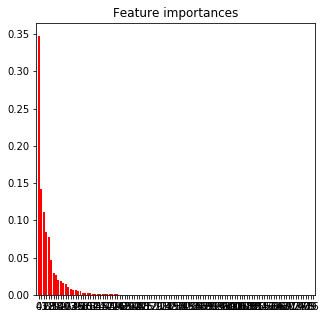

Q_35_New_Information__Mean
R2_SCORE: 0.982692
R2_SCORE: 0.857098
Feature ranking:
1. Software (0.292747)
2. Windows_frame_count (0.174746)
3. Age_15_24_frame_count (0.077614)
4. Happiness_total_duration (0.063704)
5. Fear_total_duration (0.047055)
6. Macbook Air_dur (0.039639)
7. HP Spectre x360, Windows_dur (0.039150)
8. Hp_frame_count (0.035478)
9. Female_frame_count (0.021759)
10. Age_25_34_frame_count (0.021325)
11. HP Spectre x360_frame_count (0.019633)
12. Age_0_5_frame_count (0.018889)
13. Surface Pen_frame_count (0.017876)
14. Unrelated_first_ocr (0.017447)
15. Eastasian_total_duration (0.017177)
16. Surface Pen_dur (0.012361)
17. Related_Brand_first_ocr (0.011629)
18. Latino_total_duration (0.010270)
19. Caucasian_frame_count (0.007208)
20. Related_Brand_dur (0.007155)
21. Unrelated_total_ocr (0.005976)
22. Female_total_duration (0.005933)
23. Neutral_total_duration (0.005314)
24. Happiness_frame_count (0.004965)
25. Related_Brand_last_ocr (0.004233)
26. Macbook Air_frame_coun

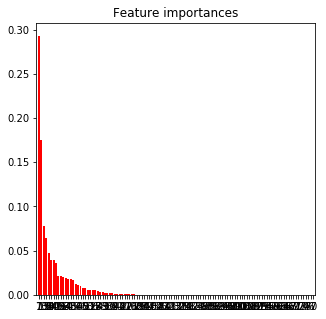

Q_6_Enjoyment__Mean
R2_SCORE: 0.982652
R2_SCORE: 0.758010
Feature ranking:
1. Related_Brand_dur (0.298887)
2. African_frame_count (0.127627)
3. Yoga_dur (0.093840)
4. Surface Pen_dur (0.059088)
5. Latino_frame_count (0.056440)
6. Fear_total_duration (0.045446)
7. Age_25_34_total_duration (0.040832)
8. Age_25_34_frame_count (0.036990)
9. Related_Brand_first_ocr (0.025488)
10. Software (0.022438)
11. Male_frame_count (0.017066)
12. Age_15_24_total_duration (0.016180)
13. Eastasian_total_duration (0.014792)
14. Unrelated_last_ocr (0.013189)
15. Surface Pro 4, Apple_MacBookAir13_dur (0.012985)
16. Microsoft_frame_count (0.012885)
17. Angry_total_duration (0.011524)
18. Age_0_5_frame_count (0.011119)
19. Surprise_frame_count (0.009202)
20. Microsoft_total_ocr (0.007257)
21. Video_name (0.007095)
22. Fear_frame_count (0.006312)
23. Hp_dur.1 (0.006302)
24. Neutral_frame_count (0.005470)
25. Microsoft Surface_frame_count (0.005368)
26. Disgust_frame_count (0.004258)
27. Windows_dur (0.003958)


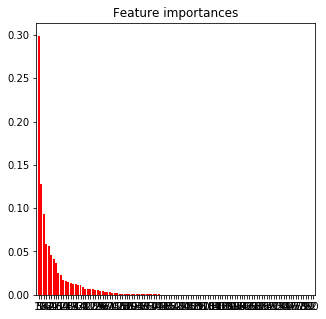

Q_20_Brand_Appeal__Mean
R2_SCORE: 0.985904
R2_SCORE: 0.786439
Feature ranking:
1. Related_Brand_first_ocr (0.313755)
2. Video_name (0.264062)
3. Surface Pen_frame_count (0.090200)
4. Female_total_duration (0.051540)
5. Surprise_total_duration (0.031214)
6. Software (0.026907)
7. Unrelated_first_ocr (0.025176)
8. Windows_frame_count (0.020551)
9. Surface pro 4_dur (0.017307)
10. Windows 10_total_ocr (0.016391)
11. Caucasian_frame_count (0.011699)
12. Macbook Air_frame_count (0.011097)
13. Age_25_34_total_duration (0.009954)
14. Related_Brand_last_ocr (0.009308)
15. Age_0_5_frame_count (0.008565)
16. HP Spectre x360, Windows_dur (0.007178)
17. Male_frame_count (0.006711)
18. Age_15_24_frame_count (0.006361)
19. Sadness_total_duration (0.006170)
20. Fear_total_duration (0.006135)
21. African_total_duration (0.005895)
22. Caucasian_total_duration (0.005471)
23. Latino_total_duration (0.005445)
24. Yoga_dur (0.005252)
25. Microsoft Surface_dur (0.004861)
26. Microsoft_frame_count (0.004751)

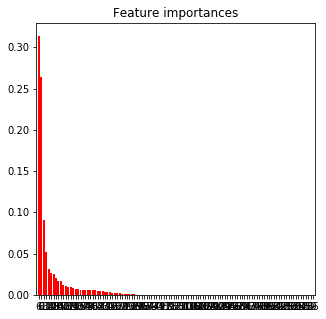

Q_32_Understanding__Mean
R2_SCORE: 0.983511
R2_SCORE: 0.748889
Feature ranking:
1. Windows 10, HP_Spectre_frame_count (0.205773)
2. Female_total_duration (0.198455)
3. Ad_type_tv (0.086342)
4. Happiness_total_duration (0.055204)
5. Fear_total_duration (0.053199)
6. Sadness_frame_count (0.045184)
7. African_frame_count (0.040562)
8. Age_0_5_total_duration (0.029672)
9. Microsoft_total_ocr (0.029533)
10. Age_15_24_total_duration (0.029514)
11. Age_25_34_total_duration (0.023674)
12. Yoga_dur (0.022096)
13. Happiness_frame_count (0.020208)
14. Related_Brand_last_ocr (0.017870)
15. Caucasian_frame_count (0.013704)
16. Related_Brand_dur (0.011899)
17. Unrelated_last_ocr (0.011678)
18. Windows 10_first_ocr (0.010542)
19. Female_frame_count (0.008998)
20. Windows_frame_count (0.008303)
21. Disgust_frame_count (0.007858)
22. Latino_frame_count (0.006954)
23. Surface Pro 4, Surface Book_dur (0.006755)
24. Macbook Air_dur (0.006090)
25. Age_15_24_frame_count (0.005676)
26. Related_Brand_first_oc

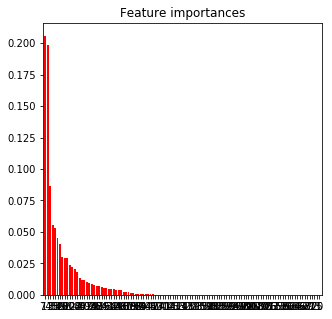

Q_33_Relevance_of_Information__Mean
R2_SCORE: 0.937924
R2_SCORE: 0.710506
Feature ranking:
1. Yoga_dur (0.179533)
2. Age_0_5_frame_count (0.143674)
3. Female_total_duration (0.102218)
4. Fear_total_duration (0.088026)
5. Age_15_24_total_duration (0.086052)
6. Happiness_frame_count (0.083477)
7. Related_Brand_first_ocr (0.056615)
8. Age_25_34_frame_count (0.050994)
9. Fear_frame_count (0.036573)
10. African_total_duration (0.034657)
11. Related_Brand_dur (0.020437)
12. Ad_type_tv (0.018516)
13. Windows 10 PC_frame_count (0.016700)
14. Age_15_24_frame_count (0.015359)
15. Caucasian_frame_count (0.015015)
16. Dell XPS 13_frame_count (0.008958)
17. Dell XPS 13_dur (0.008856)
18. Microsoft_frame_count (0.008286)
19. Neutral_total_duration (0.005897)
20. Surface Pro 4, Apple_MacBookAir13_frame_count (0.004778)
21. Neutral_frame_count (0.003883)
22. Age_35_44_total_duration (0.003286)
23. Female_frame_count (0.002913)
24. Windows_dur (0.001078)
25. Unrelated_dur (0.000824)
26. Unrelated_last_

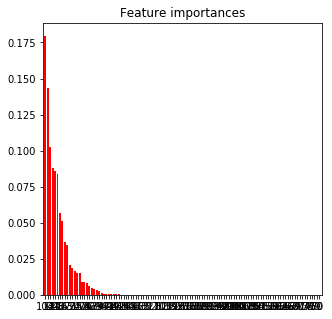

Q_34_Credibility_of_Information__Mean
R2_SCORE: 0.956510
R2_SCORE: 0.783254
Feature ranking:
1. Related_Brand_first_ocr (0.188662)
2. Unrelated_first_ocr (0.165552)
3. Latino_frame_count (0.104723)
4. Surface pro 4_dur (0.065971)
5. Related_Brand_dur (0.056607)
6. Windows 10, HP_Spectre_dur (0.053002)
7. Microsoft_frame_count (0.051469)
8. HP Spectre x360_frame_count (0.042044)
9. Happiness_frame_count (0.041373)
10. Fear_total_duration (0.028738)
11. Surface Pen_frame_count (0.023022)
12. Age_25_34_total_duration (0.022342)
13. African_frame_count (0.018404)
14. Happiness_total_duration (0.018179)
15. Microsoft Surface_dur (0.016594)
16. Surface Pro 4_dur (0.014566)
17. Yoga_dur (0.012456)
18. Age_15_24_total_duration (0.011790)
19. Fear_frame_count (0.009334)
20. Windows_frame_count (0.008838)
21. Female_frame_count (0.008241)
22. Unrelated_last_ocr (0.005349)
23. ASUS T102_frame_count (0.004254)
24. Age_0_5_frame_count (0.003527)
25. Microsoft Surface_frame_count (0.002943)
26. Fema

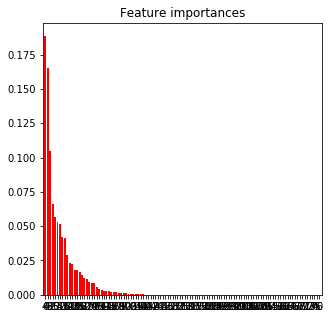

Q_35_New_Information__Mean.1
R2_SCORE: 0.954543
R2_SCORE: 0.855540
Feature ranking:
1. Microsoft Surface_frame_count (0.200622)
2. HP Spectre x360, Windows_dur (0.154357)
3. African_frame_count (0.137026)
4. Age_25_34_total_duration (0.119893)
5. Surface pro 4_dur (0.047685)
6. Surface Pen_dur (0.039275)
7. ASUS T102_frame_count (0.038450)
8. Microsoft_frame_count (0.033464)
9. Software (0.033019)
10. Related_Brand_first_ocr (0.021985)
11. Related_Brand_last_ocr (0.019806)
12. Macbook Air_dur (0.017834)
13. Latino_frame_count (0.015432)
14. Happiness_frame_count (0.015065)
15. Age_15_24_frame_count (0.009484)
16. Yoga_dur (0.009213)
17. Fear_frame_count (0.008462)
18. Surface Pen_frame_count (0.007912)
19. Ad_type_tv (0.007764)
20. Female_total_duration (0.007393)
21. Fear_total_duration (0.007017)
22. Angry_frame_count (0.006046)
23. Windows 10_first_ocr (0.005319)
24. Female_frame_count (0.004946)
25. Latino_total_duration (0.004533)
26. Surprise_total_duration (0.004354)
27. Male_fr

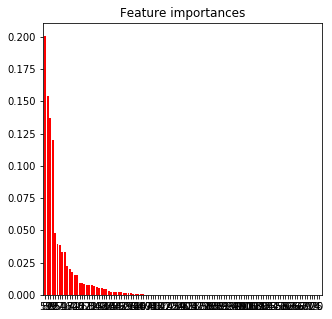

Q_36_Brand_Difference__Mean
R2_SCORE: 0.990682
R2_SCORE: 0.865845
Feature ranking:
1. Related_Brand_first_ocr (0.376893)
2. African_frame_count (0.233932)
3. Microsoft Surface_dur (0.077040)
4. Software (0.068232)
5. Related_Brand_dur (0.031106)
6. Windows_frame_count (0.023653)
7. Age_15_24_frame_count (0.020394)
8. Caucasian_frame_count (0.018360)
9. Neutral_frame_count (0.016682)
10. Windows 10 PCs_dur (0.015289)
11. Fear_total_duration (0.013082)
12. Surface Pen_frame_count (0.012833)
13. Related_Brand_last_ocr (0.010417)
14. Fear_frame_count (0.009729)
15. Video_name (0.008813)
16. Surface Pro 4, MacBook Air_frame_count (0.005814)
17. Happiness_total_duration (0.005237)
18. Macbook Air_dur (0.004830)
19. Surprise_total_duration (0.004464)
20. Microsoft_total_ocr (0.004336)
21. Windows 10_first_ocr (0.004115)
22. Happiness_frame_count (0.003237)
23. Length_of_ad_15 (0.003148)
24. Age_35_44 (0.002851)
25. Neutral_total_duration (0.002679)
26. Microsoft Surface_frame_count (0.002642)

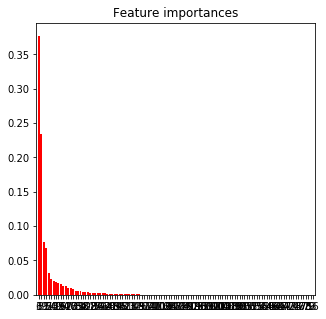

In [64]:
from sklearn.tree import DecisionTreeRegressor

for i in range(len(resamp_target_df.columns)):
    print(resamp_target_df.columns[i])
    X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    Dtree = DecisionTreeRegressor()
    Dtree.set_params(**training_params_decision_tree[i])
    #### Grid Search CV
#     print("Search starts")
#     hyper_tuning = GridSearchCV(Dtree,param_grid=parameters_tree,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#     hyper_tuning.fit(X_train,y_train)
#     print(hyper_tuning.best_params_)
#     print("Search End")
    ####
    Dtree.fit(X_train, y_train)
    preds = Dtree.predict(X_train)
    r2_score_train = r2_score(y_train, preds)
    print("R2_SCORE: %f" % (r2_score_train))
    preds = Dtree.predict(X_test)
    r2_score_test = r2_score(y_test, preds)
    print("R2_SCORE: %f" % (r2_score_test))
    importances = Dtree.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in Dtree.estimators_],
#                  axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, resamp_inputs_df.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.savefig(resamp_target_df.columns[i]+'_dt'+'.png')
    plt.show()

In [28]:
Unaided_Branding_params = {'max_depth': 8, 'max_features': 0.4, 'min_samples_leaf': 2}
Brand_mean_cues_params = {'max_depth': 8, 'max_features': 0.35, 'min_samples_leaf': 2}
Aided_Branding__Mean_params ={'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2}
Active_Involvement__Mean_params = {'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 3}
New_Information__Mean_params = {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
Enjoyment__Mean_params= {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}
Brand_Appeal__Mean_params = {'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 2}
Understanding__Mean_params = {'max_depth': 12, 'max_features': 0.35, 'min_samples_leaf': 2}
Relevance_of_Information__Mean_params = {'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 2}
Credibility_of_Information__Mean_params = {'max_depth': 10, 'max_features': 0.25, 'min_samples_leaf': 2}
Brand_Difference__Mean_params= {'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2}

<h1> Experimentation

<h1> Lasso Regression models

In [68]:
xDF = xDF.drop(['Video_name'],1)

In [69]:
#xDF ~ Interest_trace
#Skew & Kurt are within normal limits - no need for normalization
yVar = 'Interest_trace'
assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(xDF)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()
print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.iloc[:,0]
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

KeyError: 'Interest_trace'

In [22]:
#xDF ~ Enjoyment_-mean
#Skew & Kurt are within normal limits - no need for normalization
#(its strongly correlated with Interest_trace (0.7), I'm expecting similar features to appear as statistically important)
yVar = 'Enjoyment_mean'
assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR1 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR1.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

#xDF ~ Persuasion_score
#Skew & Kurt are within normal limits - no need for normalization
yVar = 'Persuasion_score'
imputeMedian(yDF, yVar)
#mean is equivalent to median we can impute any of them.

assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR2 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR2.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

#xDF ~ Brand_appeal
#Skew & Kurt are within normal limits - no need for normalization
#(its strongly correlated with Persuasion_score (0.8), I'm expecting similar features to appear as statistically important)
yVar = 'Brand_appeal'
#imputeMedian(yDF, yVar)
#mean is equivalent to median we can impute any of them.

assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR3 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR3.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

 
#xDF ~ New_information
#Skew & Kurt are within normal limits - no need for normalization
#(its strongly correlated with Persuasion_score (0.8), I'm expecting similar features to appear as statistically important)
yVar = 'New_information'
#imputeMedian(yDF, yVar)
#mean is equivalent to median we can impute any of them.

assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR4 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR4.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

 
#xDF ~ Relevance_of_information
#Skew & Kurt are within normal limits - no need for normalization
yVar = 'Relevance_of_information'
#imputeMedian(yDF, yVar)
#mean is equivalent to median we can impute any of them.

assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR5 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR5.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

 
#xDF ~ Credibility_of_information
#Skew & Kurt are within normal limits - no need for normalization
yVar = 'Credibility_of_information'
#imputeMedian(yDF, yVar)
#mean is equivalent to median we can impute any of them.

assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR6 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR6.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)

 
#xDF ~ Understanding
#Skew & Kurt are within normal limits
yVar = 'Understanding'
#imputeMedian(yDF, yVar)
#mean is equivalent to median we can impute any of them.

assert yDF[yVar].isnull().sum().sum() == 0, "Check for missing values"

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Y = yDF[yVar]
print("*"*60)
uniVar(Y)
print("*"*60)
FeatureRanking = regLasso(X, Y)
#sort_order = FR_Interest_trace.iloc[:,2].abs().sort_values(ascending = False).index
FeatureRanking.iloc[:,2] = FeatureRanking.iloc[:,2].abs()

print("Feature ranking based on L1 (0.01) regularization for - " + str(yVar))
print("*"*60)
topFR7 = FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR = topFR.append(topFR7.iloc[:,0], ignore_index = True)
FeatureRanking.sort_values(by = 'alpha = 0.010000', ascending=False).head(20)
topFR.value_counts()

KeyError: 'Enjoyment_mean'

<h1> KNN Feature Engineering

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool
import math
import numpy as np


class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    '''
        This class should implement KNN features extraction 
    '''
    def __init__(self, n_jobs, k_list, metric, n_classes=None, n_neighbors=None, eps=1e-6):
        self.n_jobs = n_jobs
        self.k_list = k_list
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
        self.n_classes_ = n_classes
    
    def fit(self, X, y):
        '''
            Set's up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        # Save how many classes we have
        self.n_classes = np.unique(y).shape[0] if self.n_classes_ is None else self.n_classes_
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every object of a dataset X
        '''
        if self.n_jobs == 1:
            test_feats = []
            for i in range(X.shape[0]):
                test_feats.append(self.get_features_for_one(X[i:i+1]))
        else:
            '''
                 *Make it parallel*
                     Number of threads should be controlled by `self.n_jobs`  
                     
                     
                     You can use whatever you want to do it
                     For Python 3 the simplest option would be to use 
                     `multiprocessing.Pool` (but don't use `multiprocessing.dummy.Pool` here)
                     You may try use `joblib` but you will most likely encounter an error, 
                     that you will need to google up (and eventually it will work slowly)
                     
                     For Python 2 I also suggest using `multiprocessing.Pool` 
                     You will need to use a hint from this blog 
                     http://qingkaikong.blogspot.ru/2016/12/python-parallel-method-in-class.html
                     I could not get `joblib` working at all for this code 
                     (but in general `joblib` is very convenient)
                     
            '''
            
            # YOUR CODE GOES HERE
            test_feats = Pool(self.n_jobs).map(self.get_features_for_one, (X[i:i+1] for i in range(X.shape[0]))) # YOUR CODE GOES HERE
            # YOUR CODE GOES HERE
            
            
            
        return np.vstack(test_feats)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single object `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 

        # Vector of size `n_neighbors`
        # Stores labels of corresponding neighbors
        neighs_y = self.y_train[neighs] 
        
        ## ========================================== ##
        ##              YOUR CODE BELOW
        ## ========================================== ##
        
        # We will accumulate the computed features here
        # Eventually it will be a list of lists or np.arrays
        # and we will use np.hstack to concatenate those
        return_list = [] 
        
        
        ''' 
            1. Fraction of objects of every class.
               It is basically a KNNСlassifiers predictions.

               Take a look at `np.bincount` function, it can be very helpful
               Note that the values should sum up to one
        '''
        for k in self.k_list:
            # YOUR CODE GOES HERE
            #neighs_y.fillna(0)
            #print(neighs_y)
            #print(self.n_classes)
            #print(k)
            
            #neighs_y = [0 if math.isnan(x) else x for x in neighs_y]
            feats = np.bincount(neighs_y[:k], minlength=self.n_classes) / k
            
            #assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        '''
            2. Same label streak: the largest number N, 
               such that N nearest neighbors have the same label.
               
               What can help you: `np.where`
        '''
        
        feats = 1 + np.where(np.append(neighs_y[:-1] != neighs_y[1:], True))[0].min(keepdims=True) # YOUR CODE GOES HERE
        
        assert len(feats) == 1
        return_list += [feats]
        
        '''
            3. Minimum distance to objects of each class
               Find the first instance of a class and take its distance as features.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.

               `np.where` might be helpful
        '''
        feats = []
        for c in range(self.n_classes):
            feats.append(np.append(neighs_dist[neighs_y == c], 999).min()) # YOUR CODE GOES HERE
        
        #assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            4. Minimum *normalized* distance to objects of each class
               As 3. but we normalize (divide) the distances
               by the distance to the closest neighbor.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
               
               Do not forget to add self.eps to denominator.
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            feat = neighs_dist[neighs_y == c] / (neighs_dist[0] + self.eps)
            feats.append(feat.min() if feat.size else 999)
        
        #assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            5. 
               5.1 Distance to Kth neighbor
                   Think of this as of quantiles of a distribution
               5.2 Distance to Kth neighbor normalized by 
                   distance to the first neighbor
               
               feat_51, feat_52 are answers to 5.1. and 5.2.
               should be scalars
               
               Do not forget to add self.eps to denominator.
        '''
        for k in self.k_list:
            
            feat_51 = neighs_dist[k-1] # YOUR CODE GOES HERE
            feat_52 = neighs_dist[k-1] / (neighs_dist[0] + self.eps) # YOUR CODE GOES HERE
            
            return_list += [[feat_51, feat_52]]
        
        '''
            6. Mean distance to neighbors of each class for each K from `k_list` 
                   For each class select the neighbors of that class among K nearest neighbors 
                   and compute the average distance to those objects
                   
                   If there are no objects of a certain class among K neighbors, set mean distance to 999
                   
               You can use `np.bincount` with appropriate weights
               Don't forget, that if you divide by something, 
               You need to add `self.eps` to denominator.
        '''
        for k in self.k_list:
            
            # YOUR CODE GOES IN HERE
            bincount = np.bincount(neighs_y[:k], minlength=self.n_classes)
            feats = np.where(
                bincount,
                np.bincount(neighs_y[:k], weights=neighs_dist[:k], minlength=self.n_classes) / (bincount + self.eps),
                999,
            )
            
            #assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        # merge
        knn_feats = np.hstack(return_list)
        
        assert knn_feats.shape == (239,) or knn_feats.shape == (239, 1)
        return knn_feats

In [ ]:
# Differently from other homework we will not implement OOF predictions ourselves
# but use sklearn's `cross_val_predict`
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
n_splits=4
skf_seed = 123

# a list of K in KNN, starts with one 
k_list = [1,4]
# We will use two metrics for KNN
for metric in ['cosine']:
    print (metric)
    
    # Set up splitting scheme, use StratifiedKFold
    # use skf_seed and n_splits defined above with shuffle=True
    skf = StratifiedKFold(n_splits=n_splits, random_state=skf_seed, shuffle=True)
    
    # Create instance of our KNN feature extractor
    # n_jobs can be larger than the number of cores
    NNF = NearestNeighborsFeats(n_jobs=1, k_list=k_list, metric=metric,n_classes=0)
    
    # Get KNN features using OOF use cross_val_predict with right parameters
    #preds = cross_val_predict(NNF, xDF_sc,yDF_sc.iloc[:,0])   
    NNF.fit(xDF_sc, yDF_sc.iloc[:,0])
    NNF.predict(xDF_sc)
    # Save the features
    #np.save('data/knn_feats_%s_train.npy' % metric, preds)

In [ ]:
from sklearn import preprocessing

x = xDF.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xDF_sc = pd.DataFrame(x_scaled)

x = yDF.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
yDF_sc = pd.DataFrame(x_scaled)

In [ ]:
data = yDF_sc
for cols in data.columns.tolist()[1:]:
    data = data.ix[data[cols] > 0]

In [ ]:
yDF_sc.iloc[:,0]

In [ ]:
yDF_sc[yDF_sc < 0] = 0

In [ ]:
xDF_sc[xDF_sc < 0] = 0

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
yDF.describe()

In [ ]:
def gt_matrix(feats,X,sz=16):
    a = []
    for i, c1 in enumerate(feats):
        b = []
        for j, c2 in enumerate(feats):
            mask = (~X[c1].isnull()) & (~X[c2].isnull())
            if i >= j:
                b.append((X.loc[mask, c1].values >= X.loc[mask, c2].values).mean())
            else:
                b.append((X.loc[mask, c1].values > X.loc[mask, c2].values).mean())

        a.append(b)

    plt.figure(figsize=(sz, sz))
    plt.imshow(a, interpolation='None')
    _ = plt.xticks(range(len(feats)), feats, rotation=90)
    _ = plt.yticks(range(len(feats)), feats, rotation=0)
    autolabel(a)
    
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value.
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
            plt.text(j, i, "%.2f" % arrayA[i, j], ha='center', va='bottom', color='w')

In [ ]:
gt_matrix(list(xDF.select_dtypes(exclude=['object']).columns)[:24],xDF)

In [ ]:
gt_matrix(list(xDF.select_dtypes(exclude=['object']).columns)[25:51],xDF)

In [ ]:
(~X.iloc[:,c1].isnull()) & (~X.iloc[:,c2].isnull())

In [ ]:
#~xDF.iloc[:,1].isnull() & ~xDF.iloc[:,1].isnull()
(xDF.loc[:, 'Software'].values >= xDF.loc[:, 'Software'].values).mean()k

In [ ]:
xDF.shape

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib

import seaborn
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
#sns.set(style="darkgrid")